# Higgs Boson Event Detection

#### Descriptions:
    
The LHC collides bunches of protons every 50 nanoseconds within each of its four experiments, each crossing producing a random number of proton-proton collisions (with a Poisson expectation between 10 and 35, depending on the LHC parameters) called events8. Two colliding protons produce a small firework in which part of the kinetic energy of the protons is converted into new particles. Most of the resulting particles are very unstable and decay quickly into a cascade of lighter particles.

Based on these properties, the properties of the decayed parent particle are inferred, and the inference chain is continued until reaching the heaviest primary particles. given the elusive nature of neutrinos, their minuscule mass, and the way they oscillate between flavors, one could very well imagine that the mass of leptons comes from an entirely different mechanism. Hence the importance of measuring as precisely as possible the coupling of the Higgs to tau arises.

Particle colliders enable us to probe the fundamental nature of matter by observing exotic particles produced by high-energy collisions. Because the experimental measurements from these collisions are necessarily incomplete and imprecise, machine learning algorithms play a major role in the analysis of experimental data. The high-energy physics community typically relies on standardized machine learning software packages for this analysis and devotes substantial effort towards improving statistical power by hand-crafting high-level features derived from the raw collider measurements.

## Import the Libraries and Dataset

In [10]:
import pandas as pd
import numpy as np

from pylab import rcParams
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix

In [13]:
df = pd.read_csv('training.csv')
df.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,b


# Exploratory Data Analysis

## DEscriptive Analysis

In [14]:
df.drop(columns=['EventId','Weight'],inplace=True)

In [15]:
df.columns

Index(['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis',
       'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet',
       'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt',
       'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality',
       'DER_lep_eta_centrality', 'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi',
       'PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_met', 'PRI_met_phi',
       'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_leading_pt',
       'PRI_jet_leading_eta', 'PRI_jet_leading_phi', 'PRI_jet_subleading_pt',
       'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi', 'PRI_jet_all_pt',
       'Label'],
      dtype='object')

In [16]:
print('Training set shape:', df.shape)

Training set shape: (250000, 31)


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 31 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   DER_mass_MMC                 250000 non-null  float64
 1   DER_mass_transverse_met_lep  250000 non-null  float64
 2   DER_mass_vis                 250000 non-null  float64
 3   DER_pt_h                     250000 non-null  float64
 4   DER_deltaeta_jet_jet         250000 non-null  float64
 5   DER_mass_jet_jet             250000 non-null  float64
 6   DER_prodeta_jet_jet          250000 non-null  float64
 7   DER_deltar_tau_lep           250000 non-null  float64
 8   DER_pt_tot                   250000 non-null  float64
 9   DER_sum_pt                   250000 non-null  float64
 10  DER_pt_ratio_lep_tau         250000 non-null  float64
 11  DER_met_phi_centrality       250000 non-null  float64
 12  DER_lep_eta_centrality       250000 non-null  float64
 13 

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
DER_mass_MMC,250000.0,-49.023079,406.345647,-999.000,78.10075,105.0120,130.60625,1192.026
DER_mass_transverse_met_lep,250000.0,49.239819,35.344886,0.000,19.24100,46.5240,73.59800,690.075
DER_mass_vis,250000.0,81.181982,40.828691,6.329,59.38875,73.7520,92.25900,1349.351
DER_pt_h,250000.0,57.895962,63.655682,0.000,14.06875,38.4675,79.16900,2834.999
DER_deltaeta_jet_jet,250000.0,-708.420675,454.480565,-999.000,-999.00000,-999.0000,0.49000,8.503
DER_mass_jet_jet,250000.0,-601.237051,657.972302,-999.000,-999.00000,-999.0000,83.44600,4974.979
DER_prodeta_jet_jet,250000.0,-709.356603,453.019877,-999.000,-999.00000,-999.0000,-4.59300,16.690
DER_deltar_tau_lep,250000.0,2.373100,0.782911,0.208,1.81000,2.4915,2.96100,5.684
DER_pt_tot,250000.0,18.917332,22.273494,0.000,2.84100,12.3155,27.59100,2834.999
DER_sum_pt,250000.0,158.432217,115.706115,46.104,77.55000,120.6645,200.47825,1852.462


In [19]:
df.describe(include='O').T

,count,unique,top,freq
Label,250000,2,b,164333


In [20]:
df['Label'].value_counts()

b    164333
s     85667
Name: Label, dtype: int64

In [21]:
print(f' Duplicated rows in the dataset: {df.duplicated().any()}') 

 Duplicated rows in the dataset: False


- The dataset have 31 columns 
- Dataset have a shape of (250000, 31)
- Dataset does not contains any null values
- Most of the columns have float data type, except for  PRI_jet_num and Label which have a data types of int and object, respectively
- No duplicated rows found in the dataset
- Label column has 2 unique values: b and s

## Data Visualization

In [22]:
plt.rcParams['figure.figsize']=(10,8)

### Univariate Analysis

**I. Target Variable**

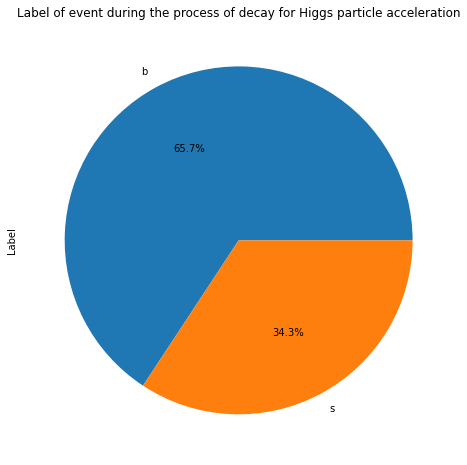

In [23]:
df['Label'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title('Label of event during the process of decay for Higgs particle acceleration')
plt.show()

**II. Feature Variables**

In [24]:
background_events = df[df['Label']=='b']
signal_events = df[df['Label']=='s']

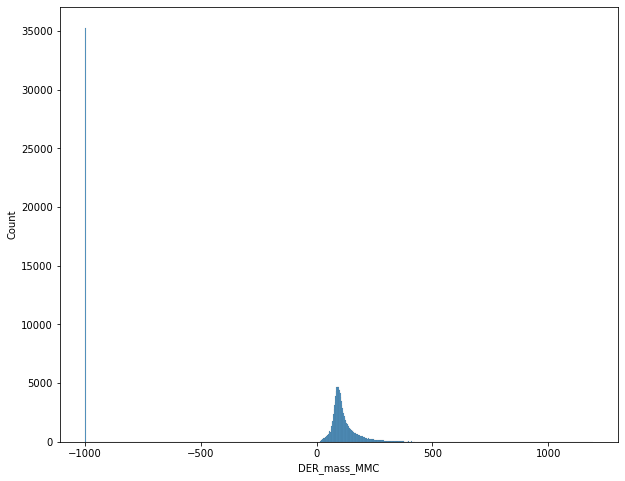

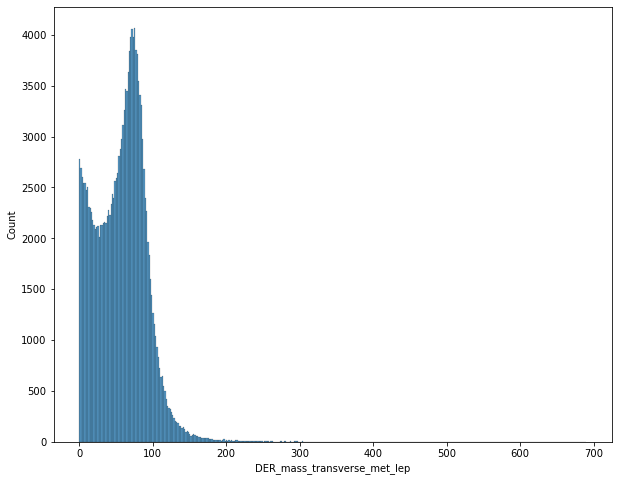

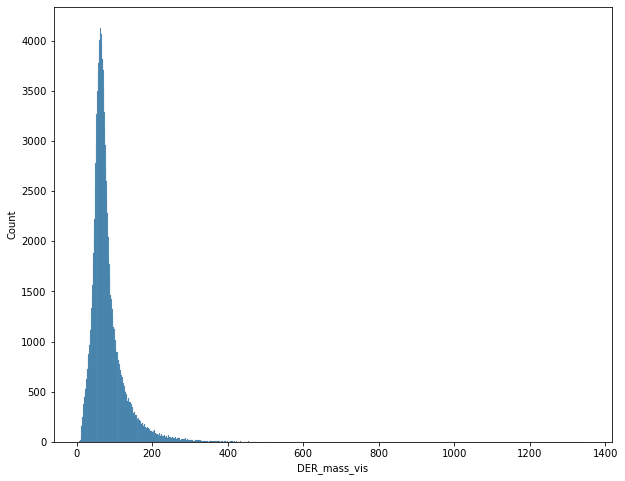

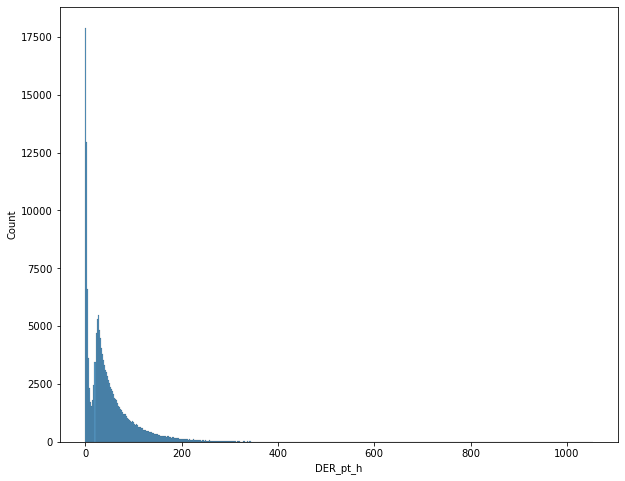

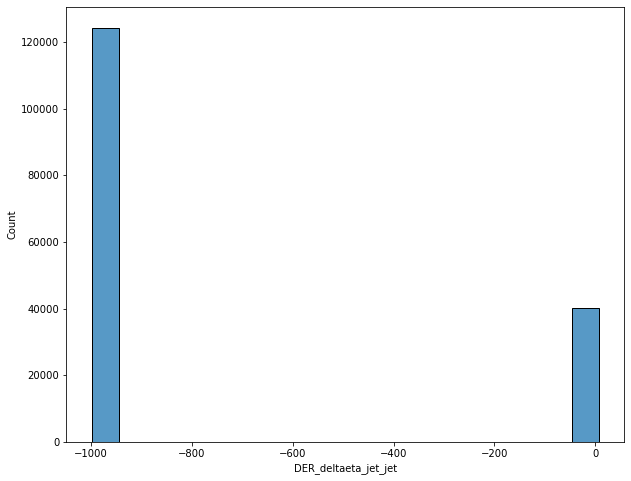

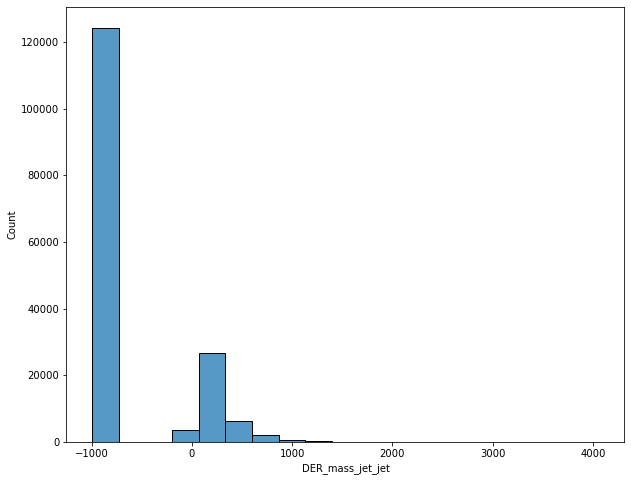

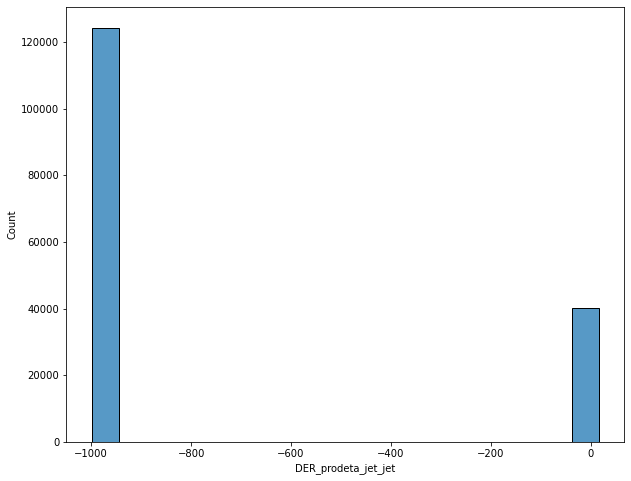

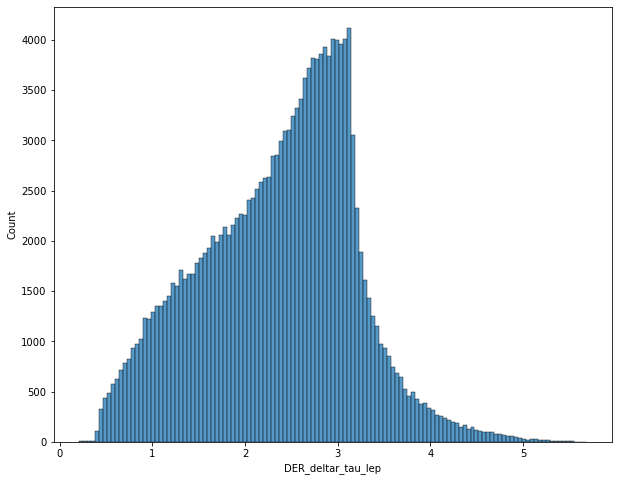

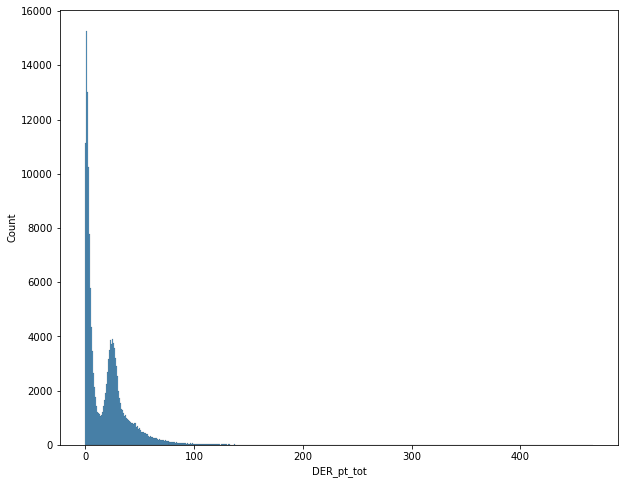

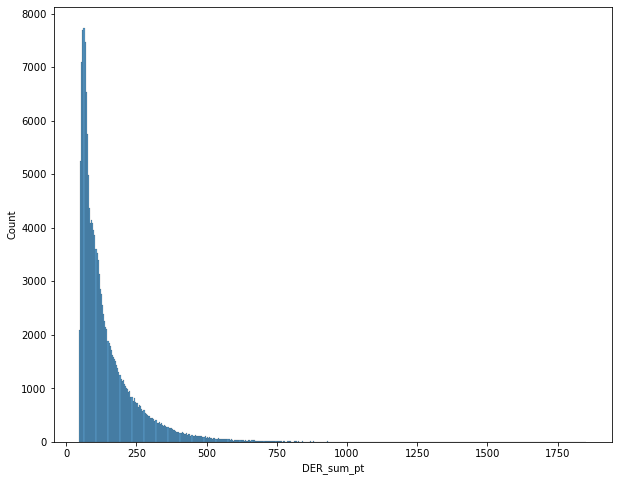

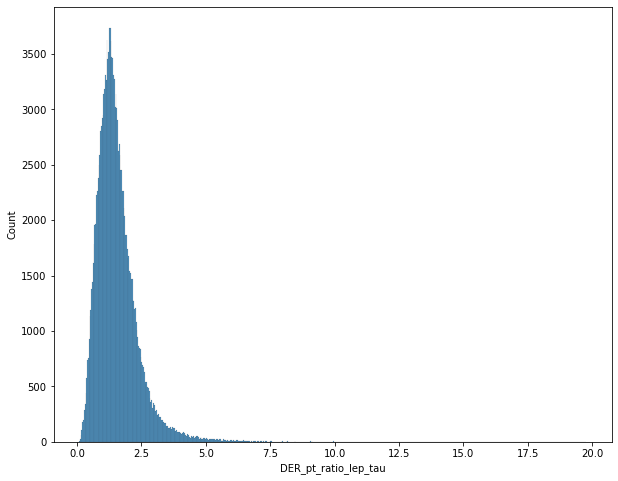

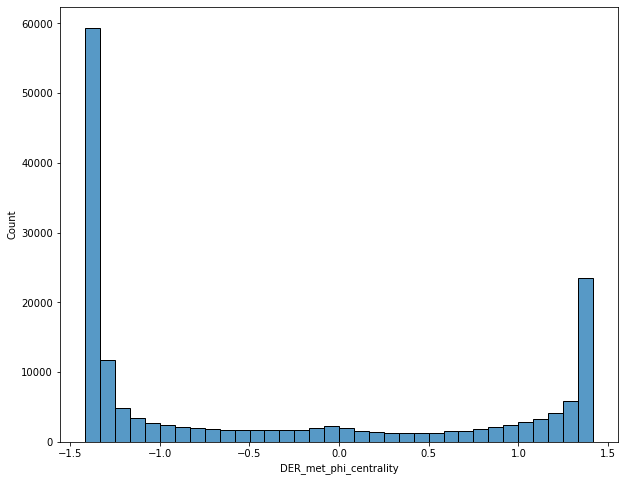

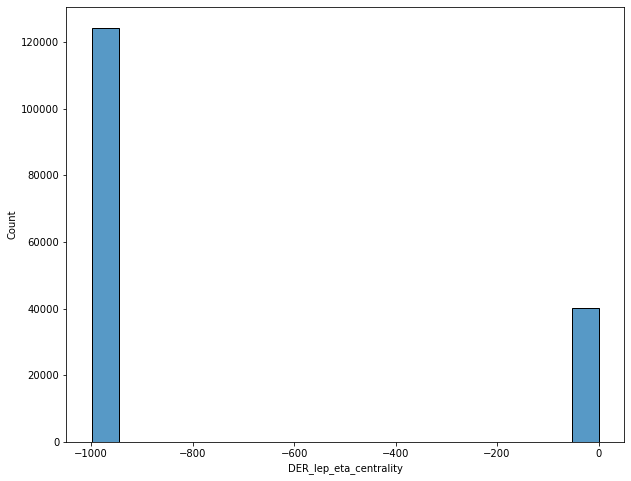

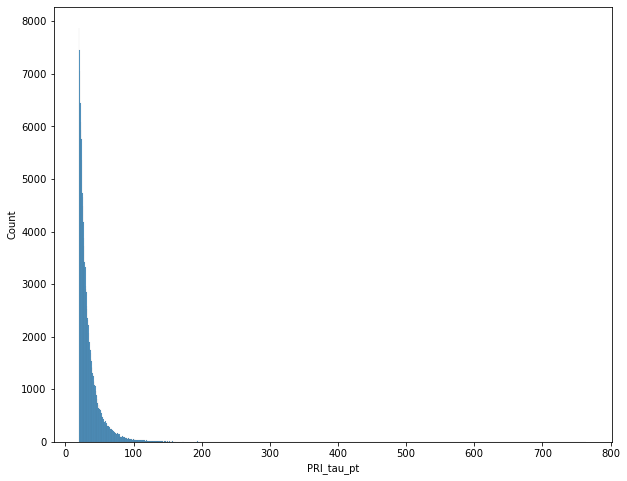

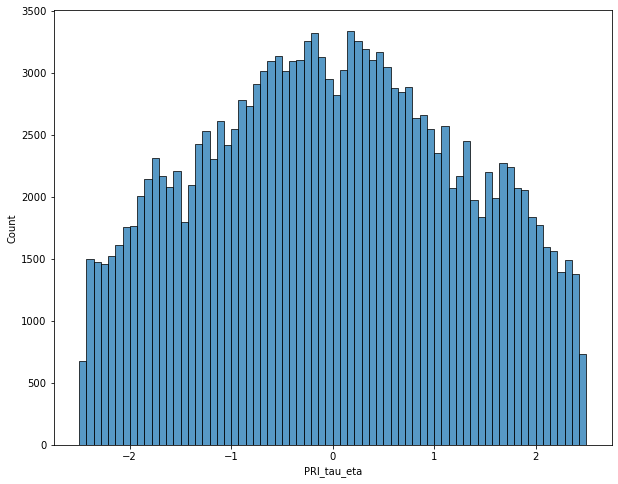

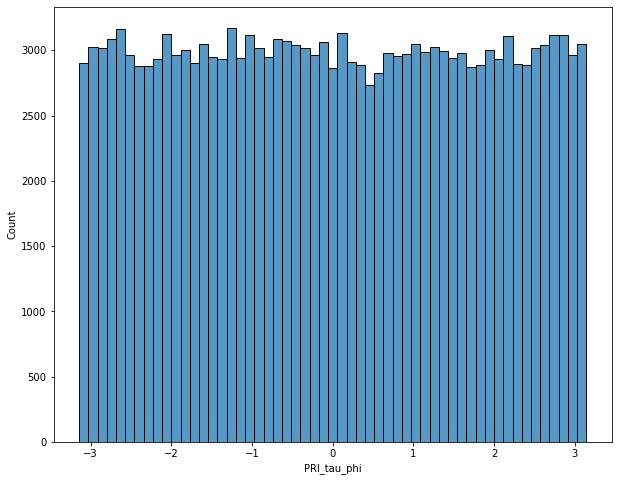

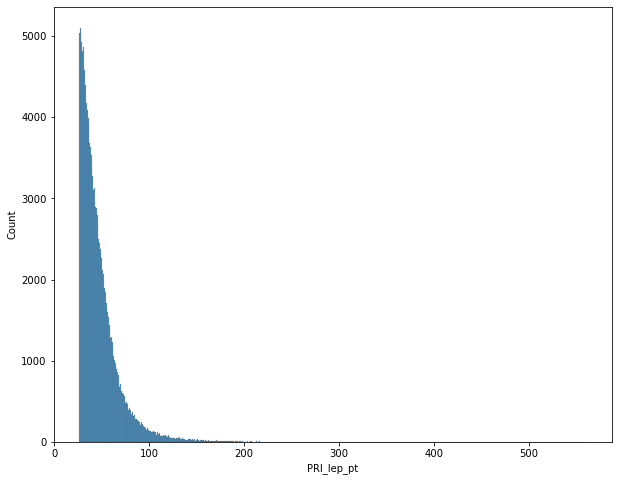

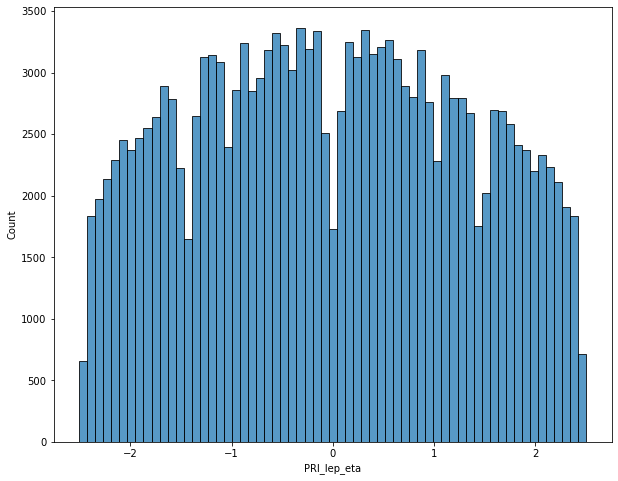

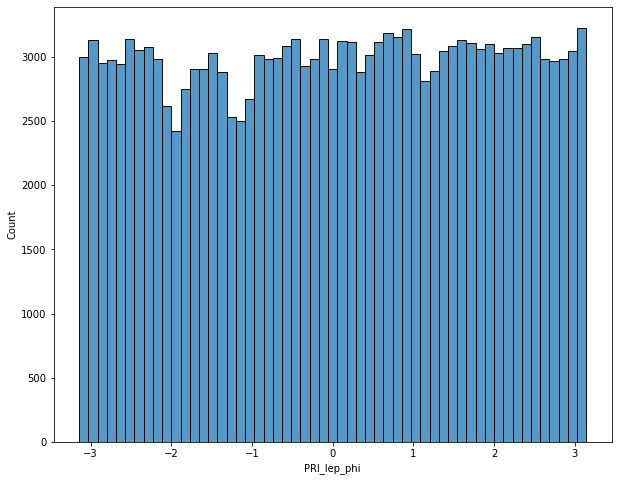

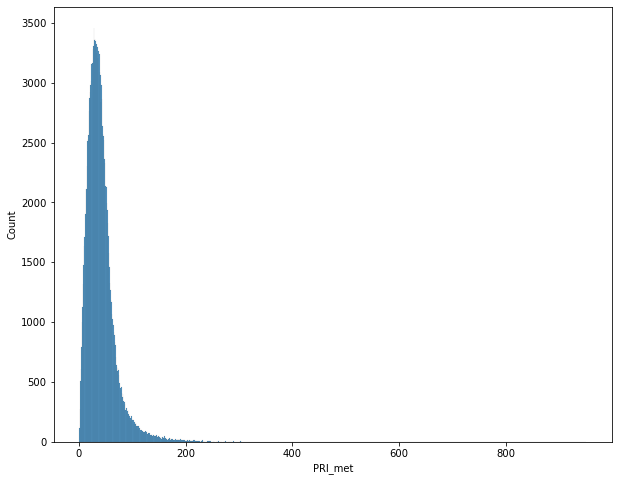

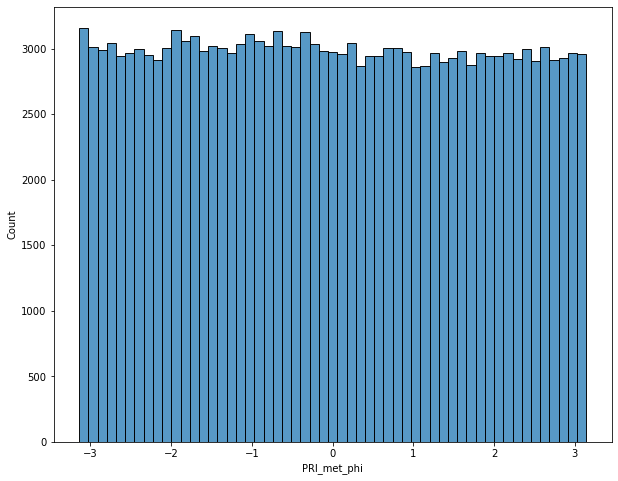

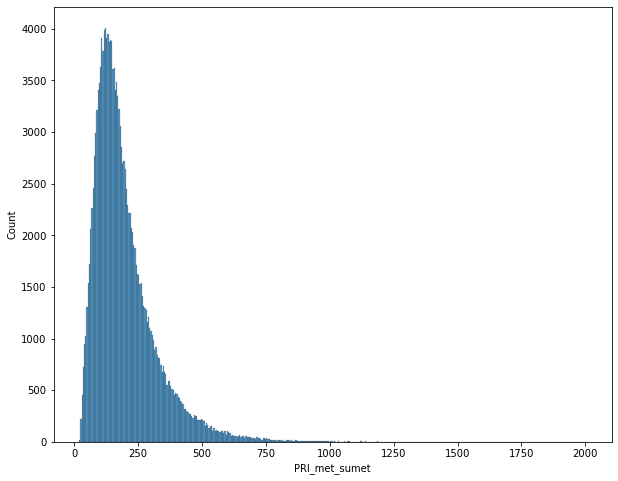

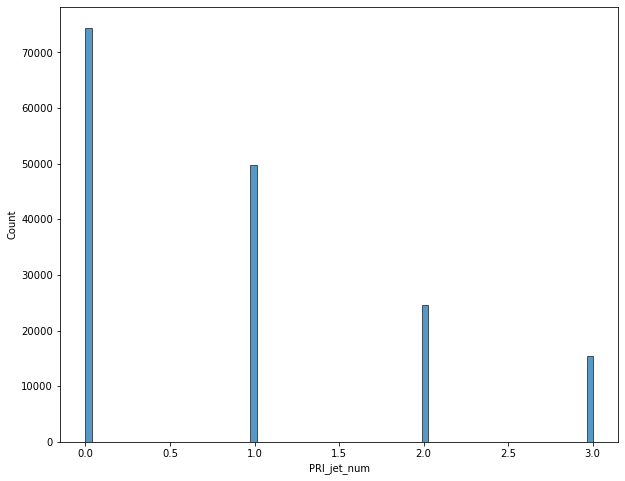

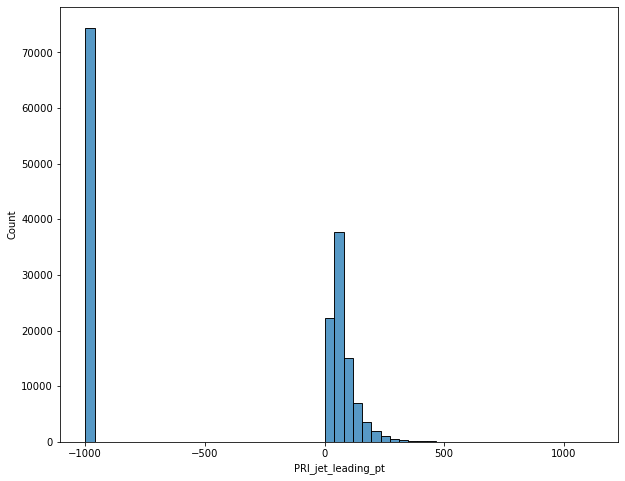

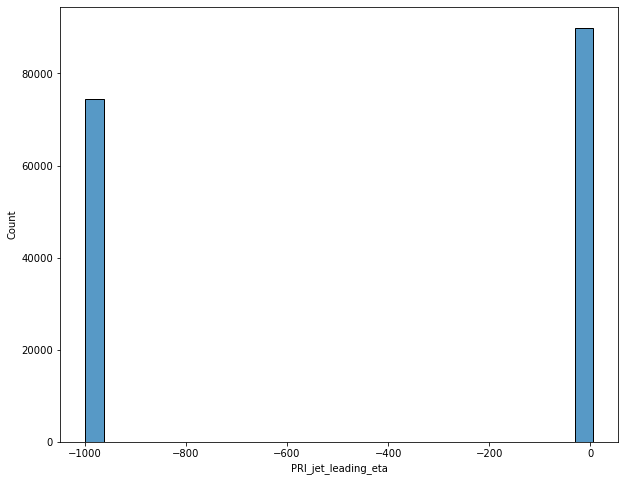

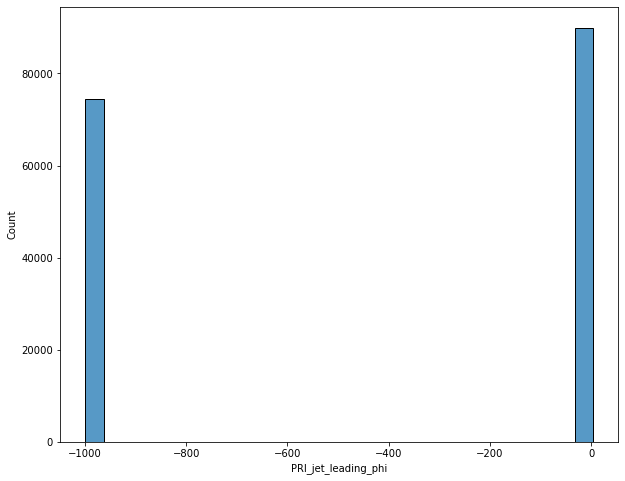

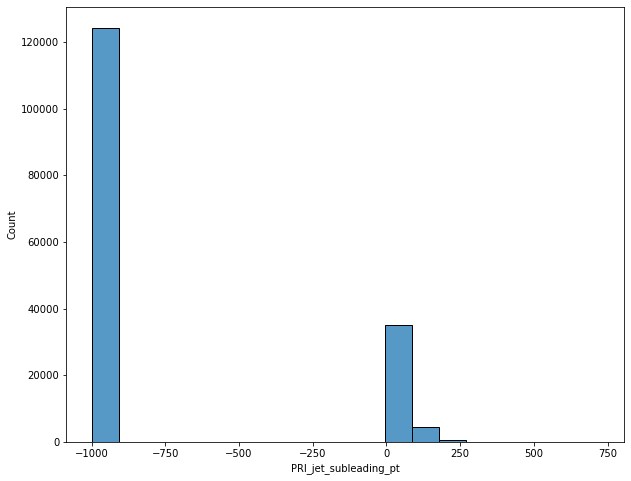

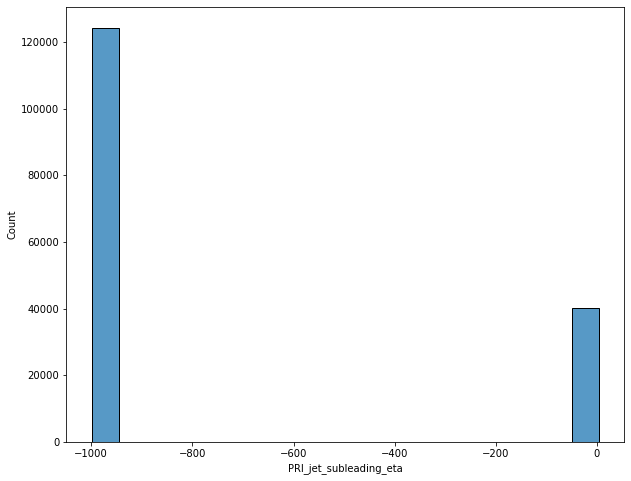

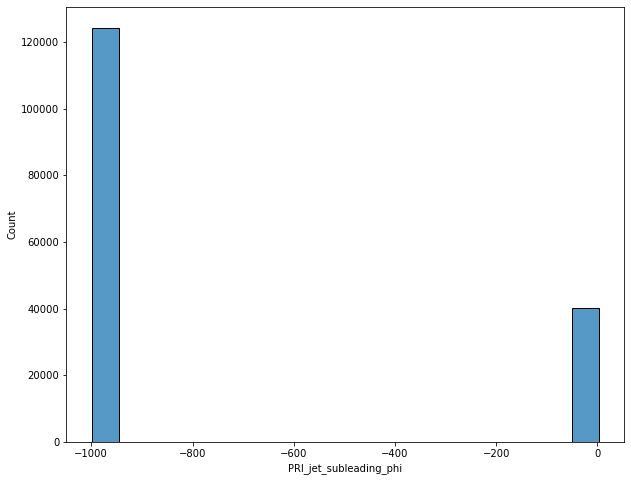

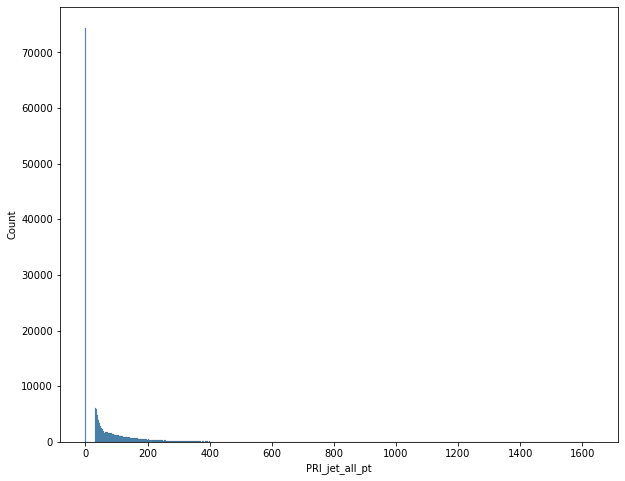

In [25]:
for col in df.drop(columns=['Label']):
    sns.histplot(x=col, data=background_events)
    plt.show()

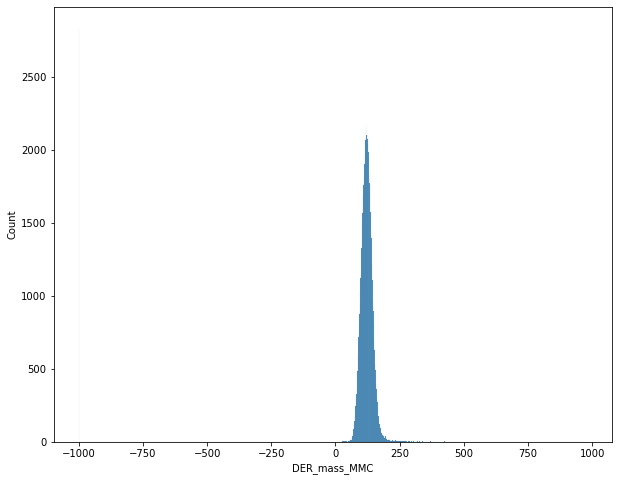

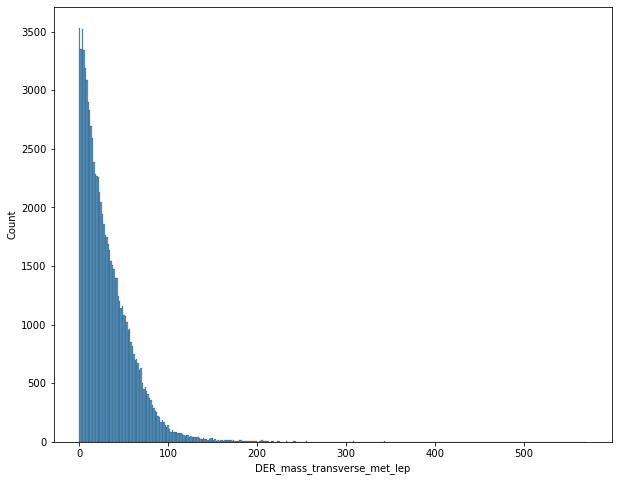

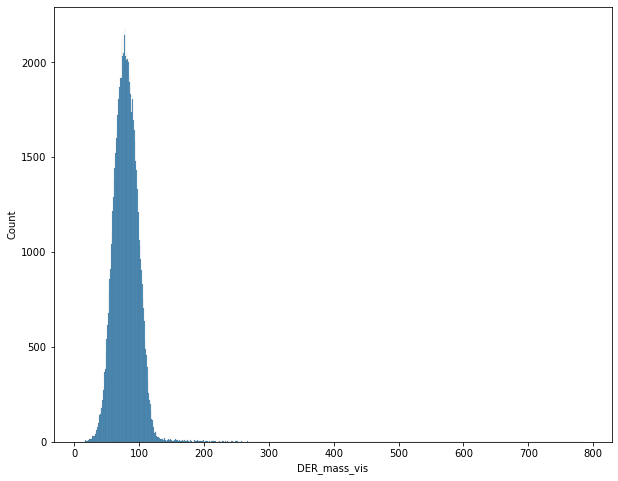

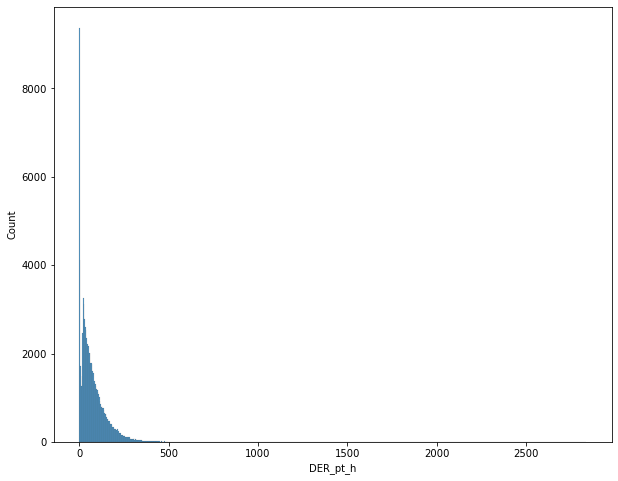

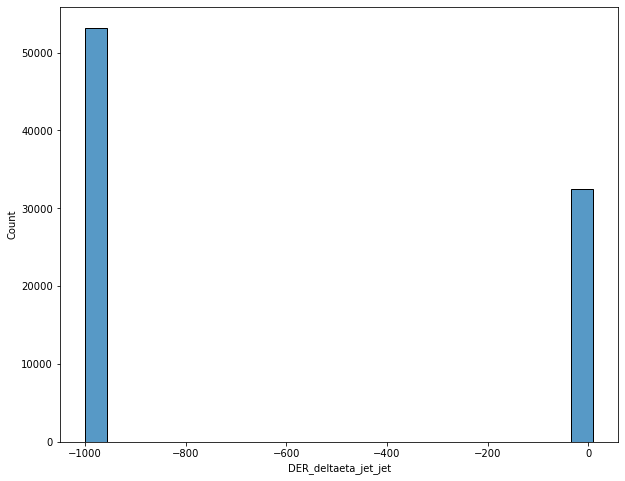

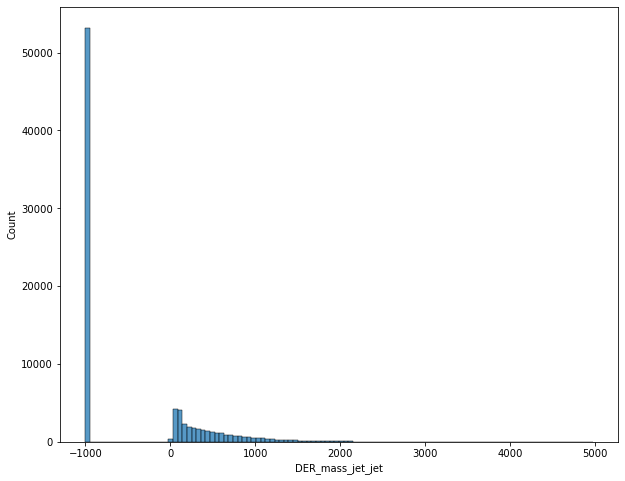

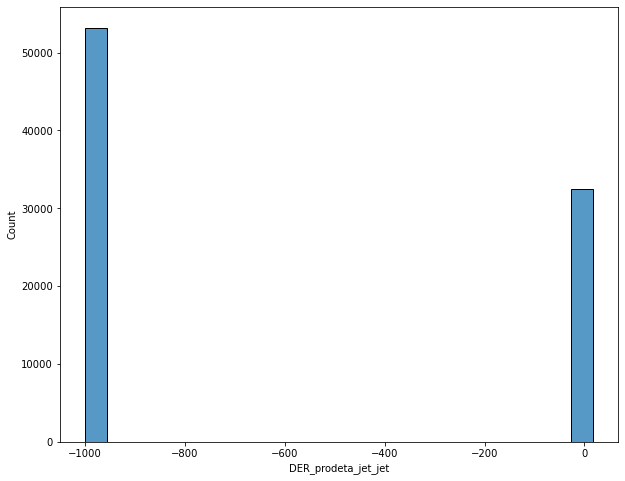

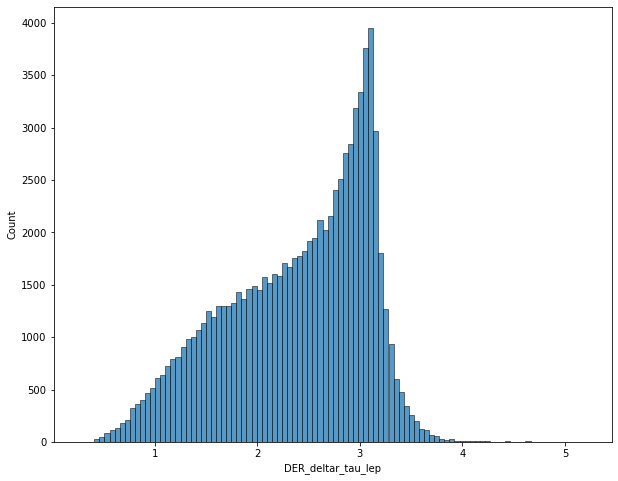

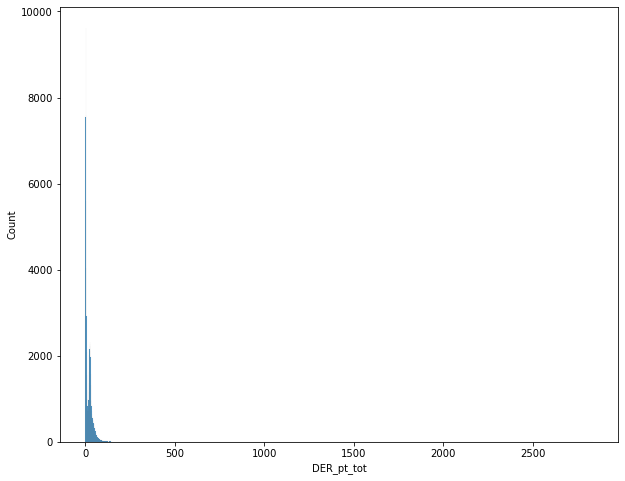

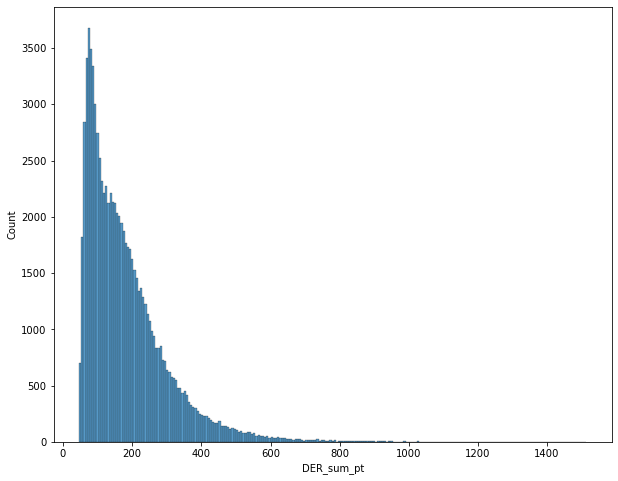

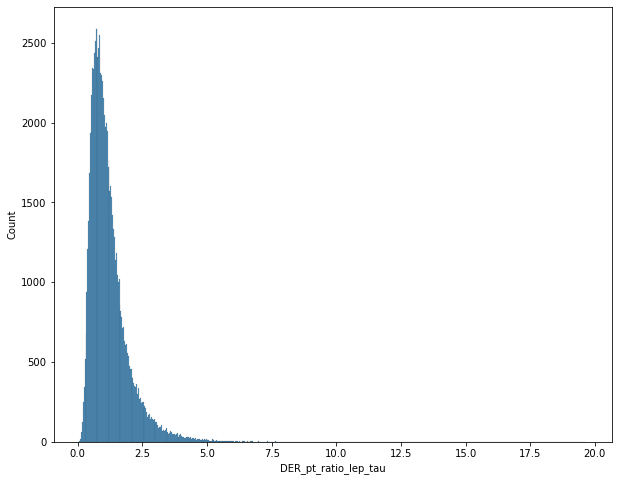

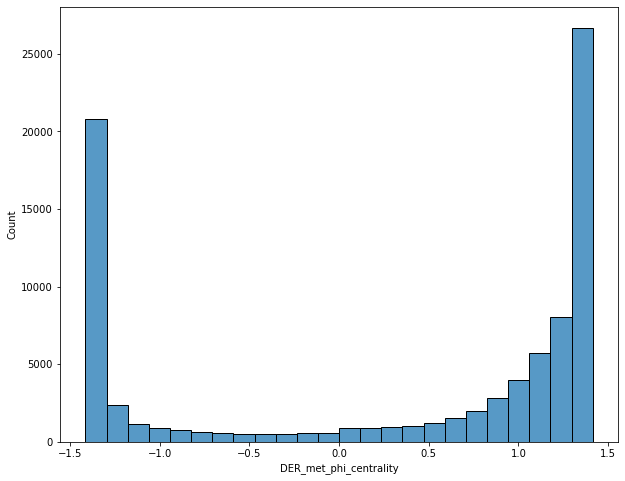

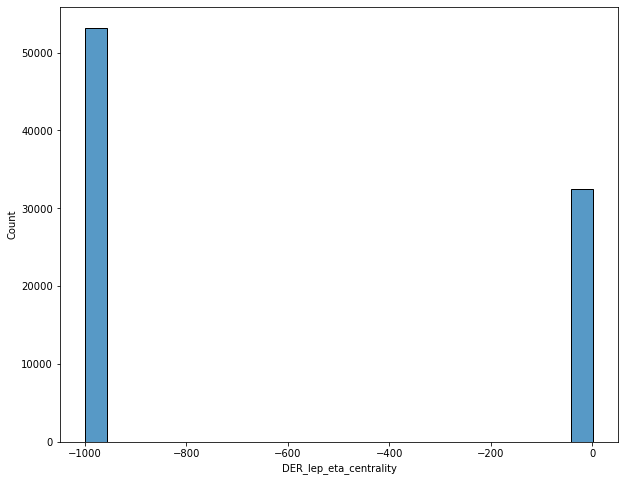

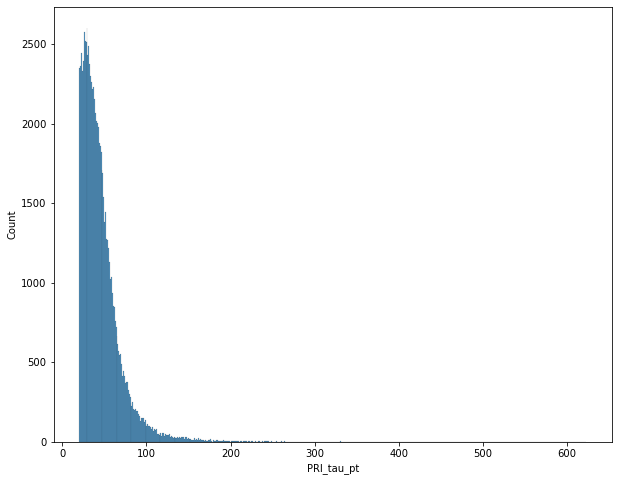

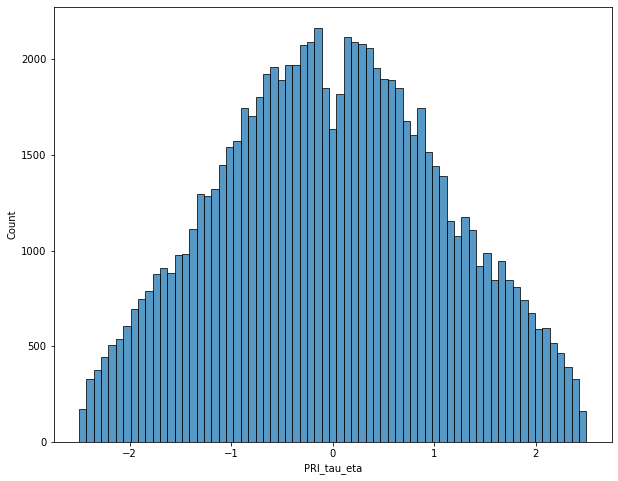

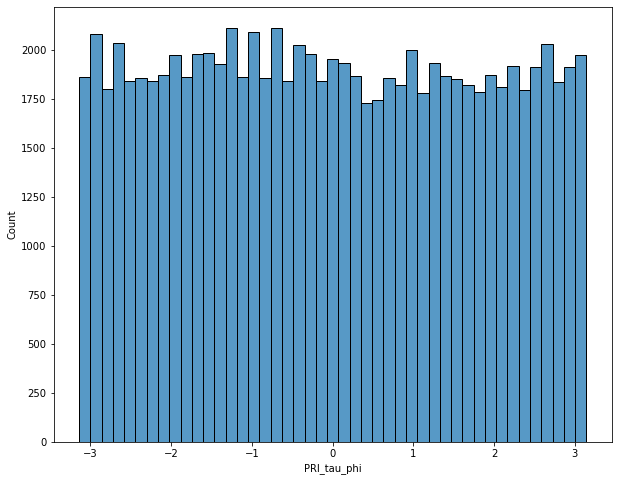

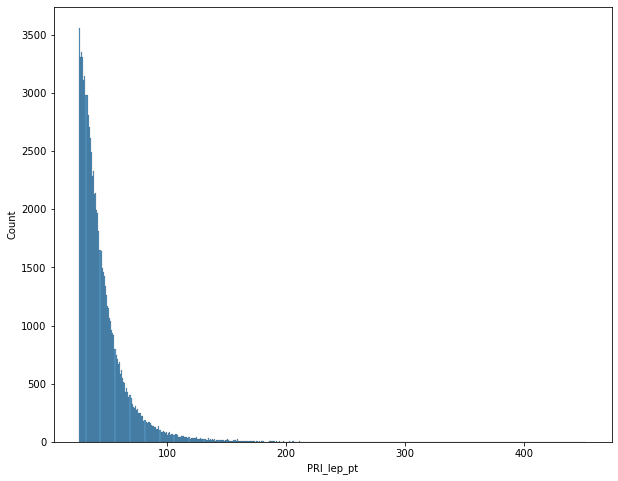

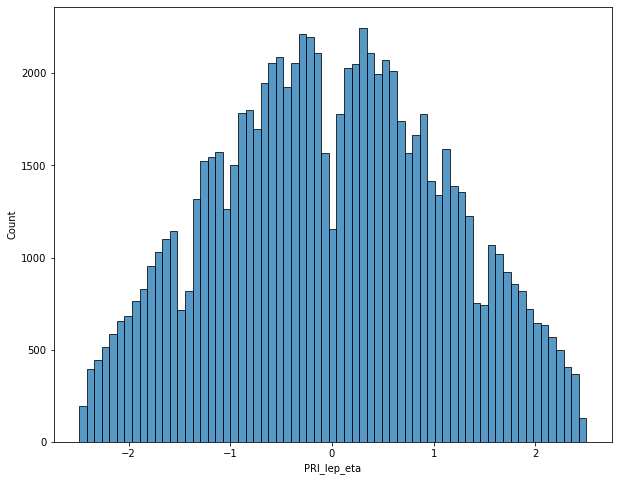

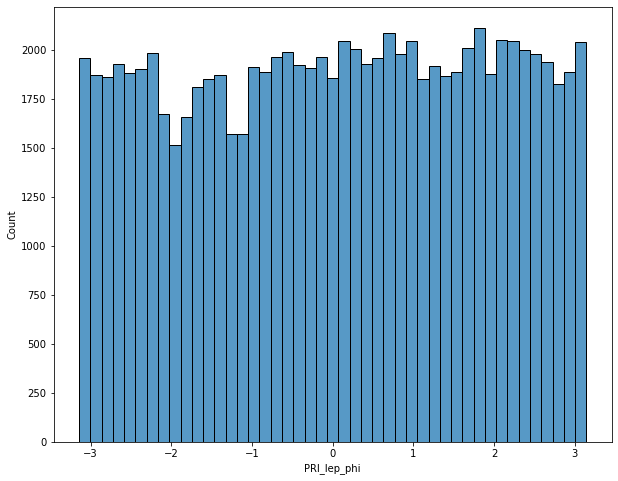

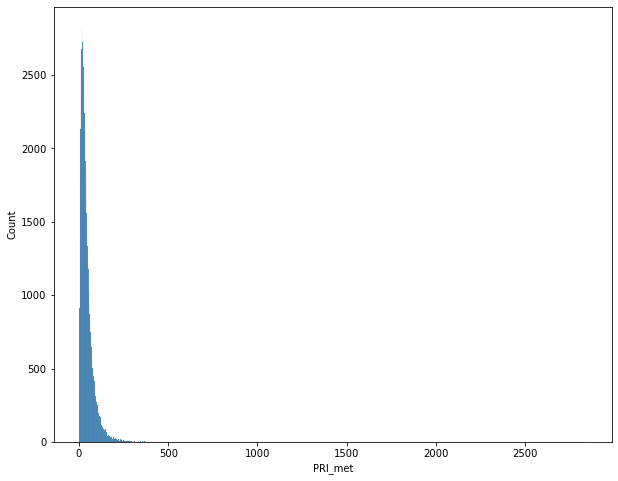

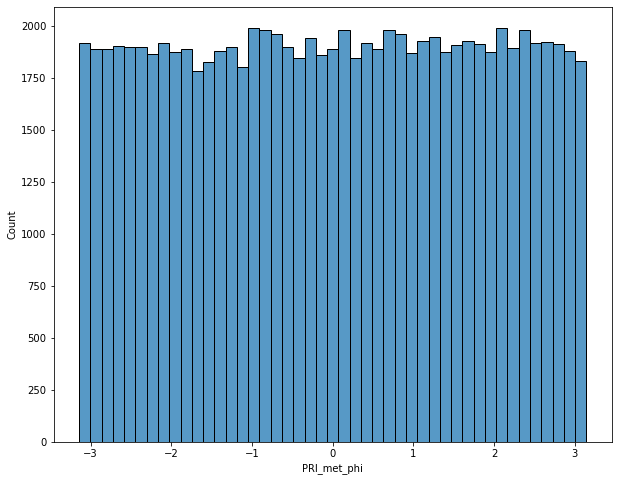

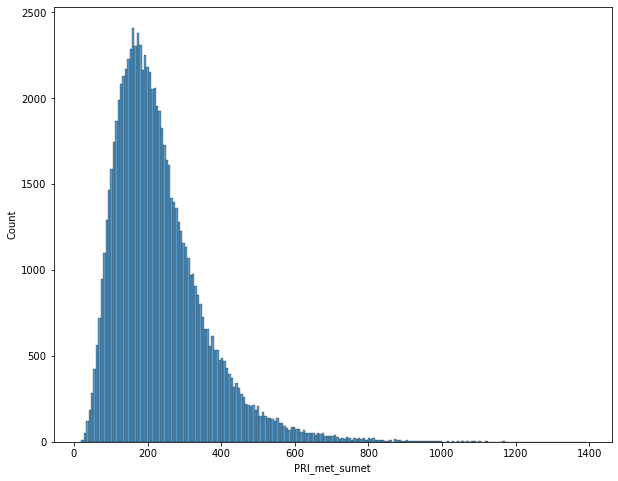

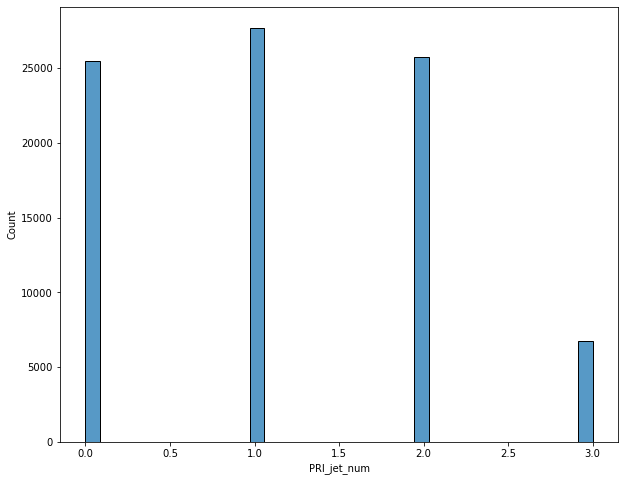

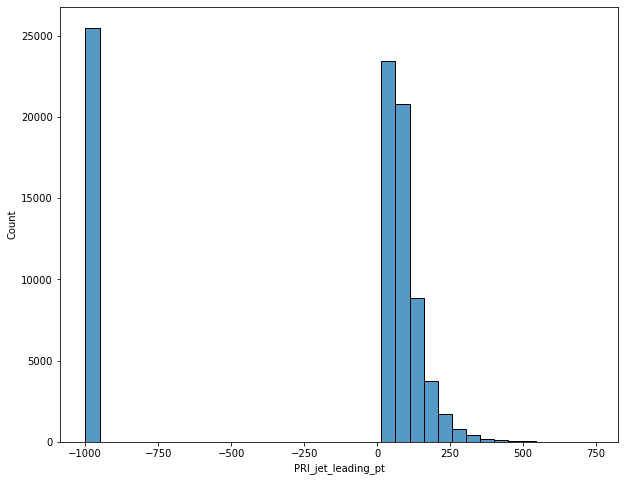

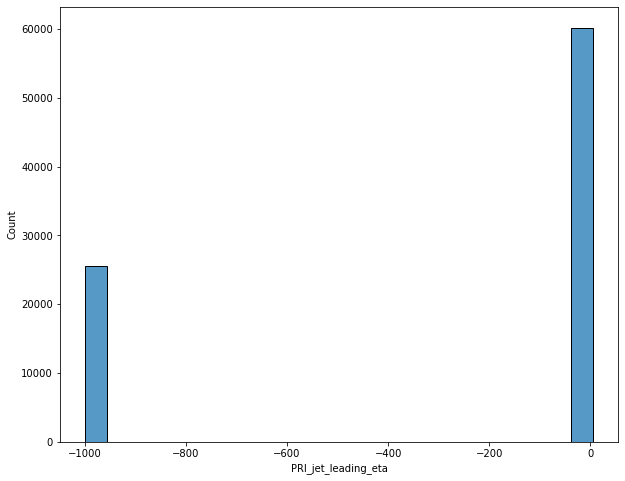

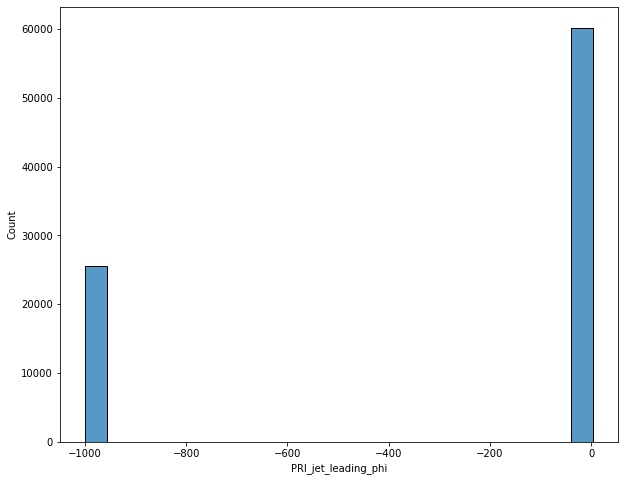

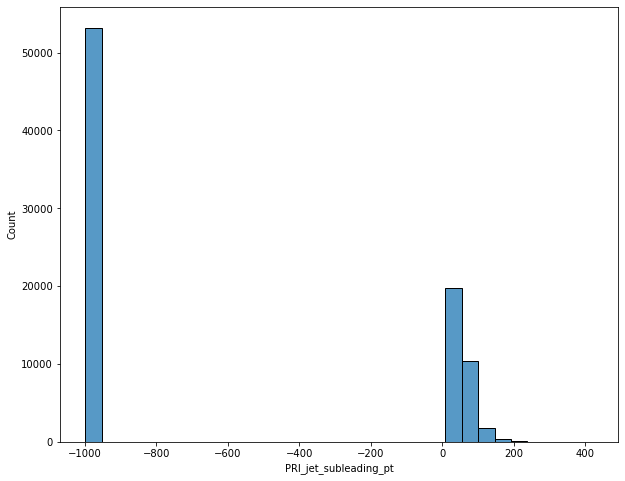

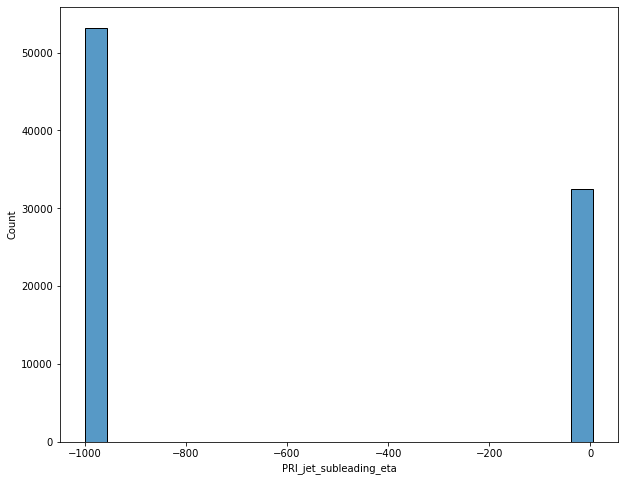

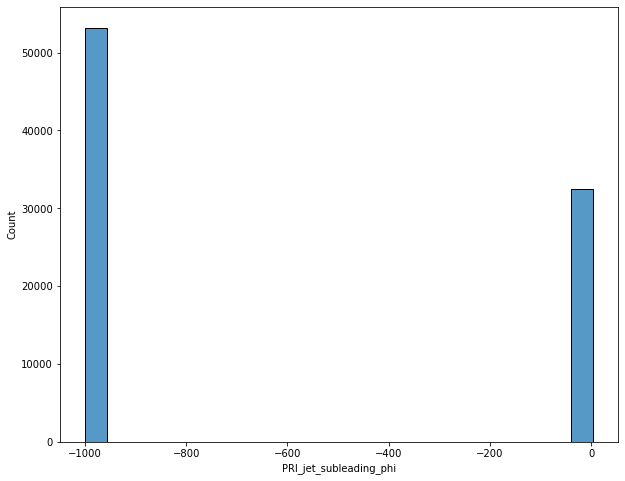

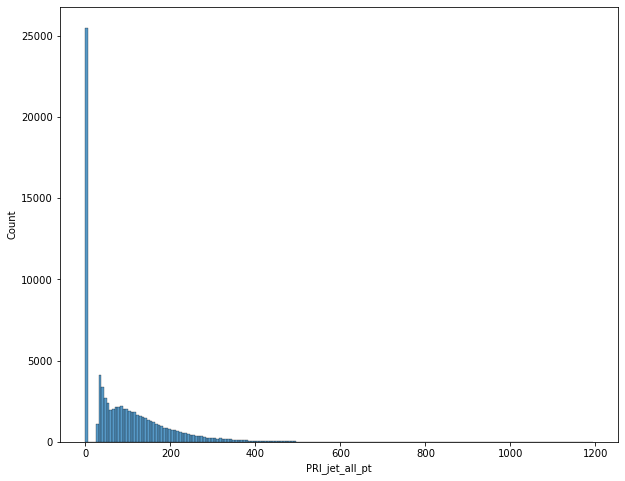

In [26]:
for col in df.drop(columns=['Label']):
    sns.histplot(x=col, data=signal_events)
    plt.show()

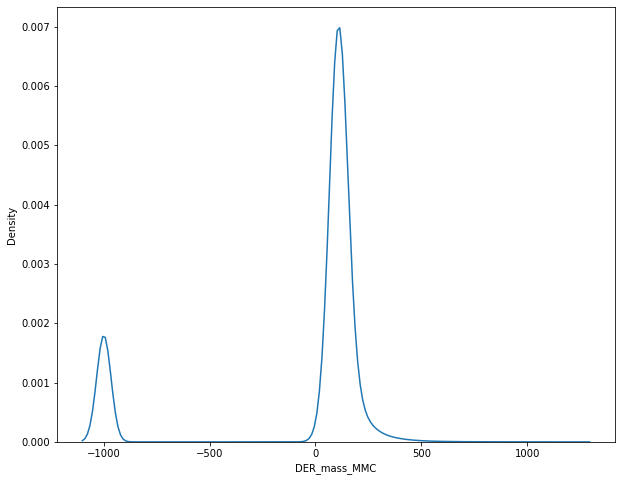

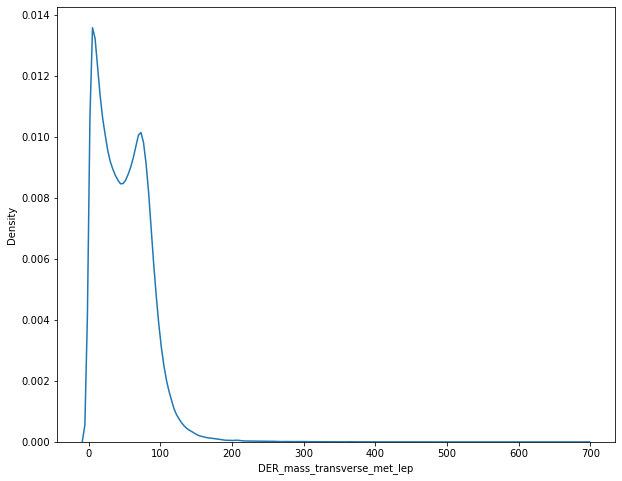

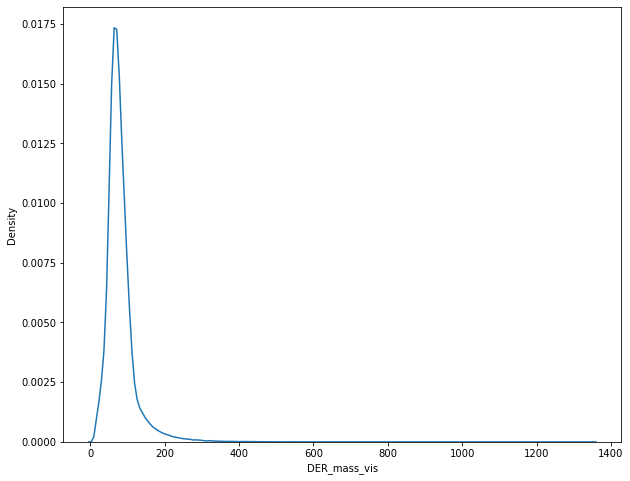

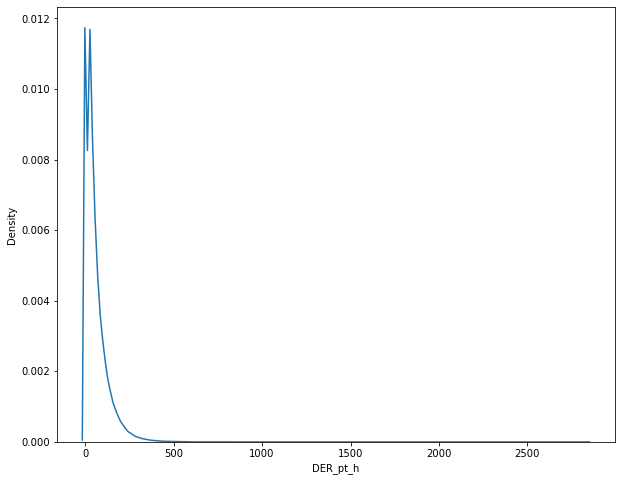

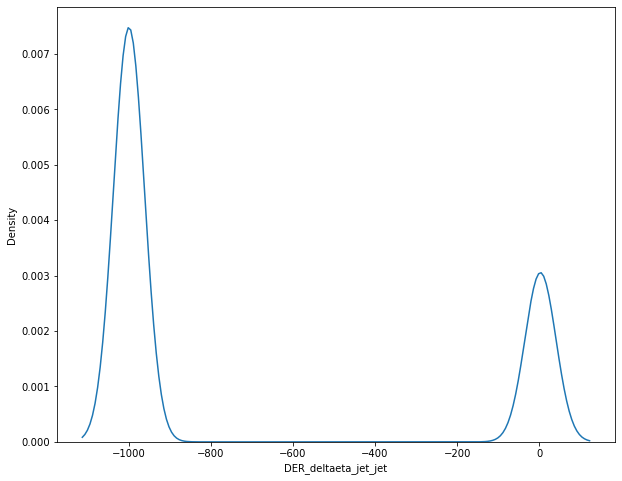

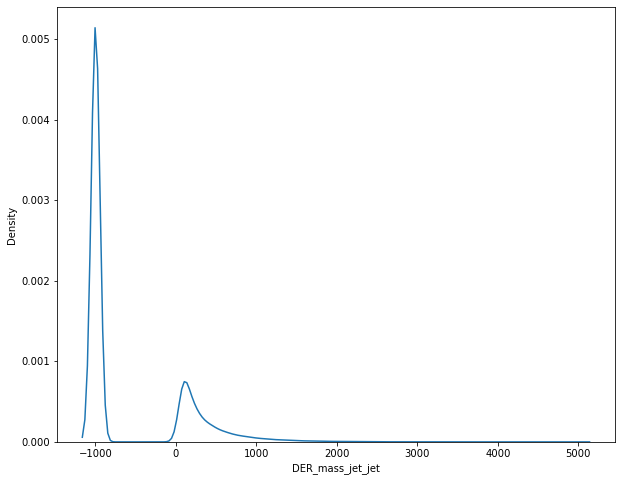

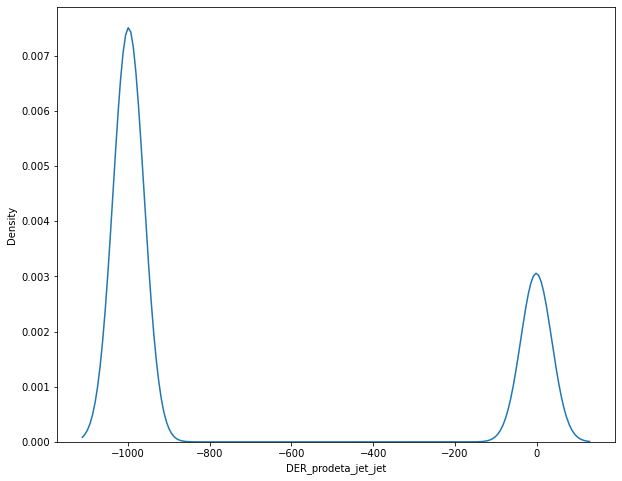

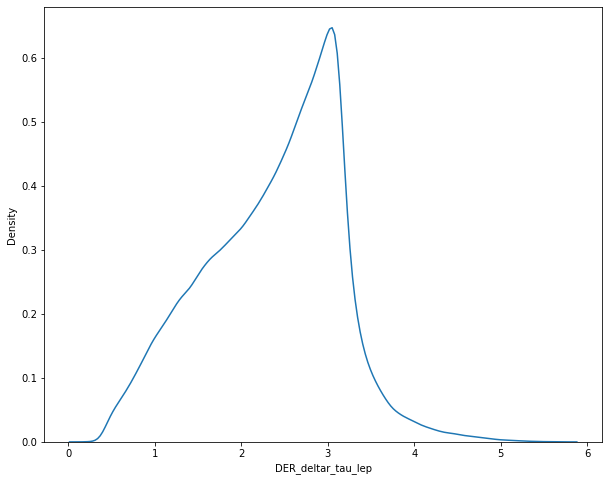

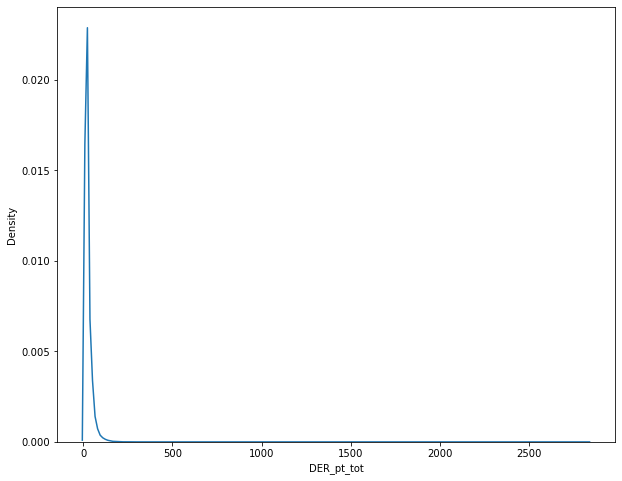

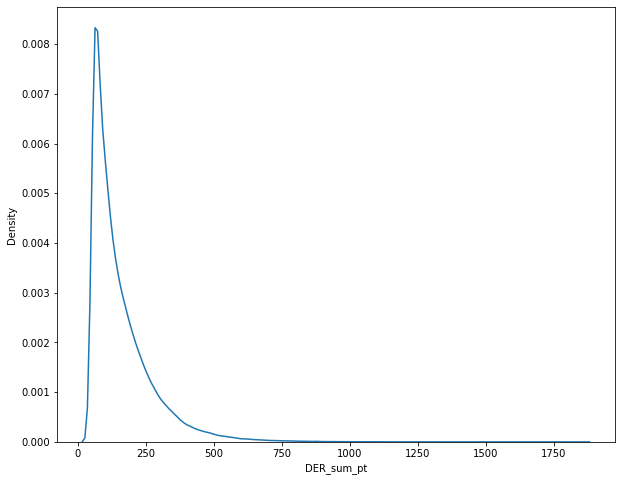

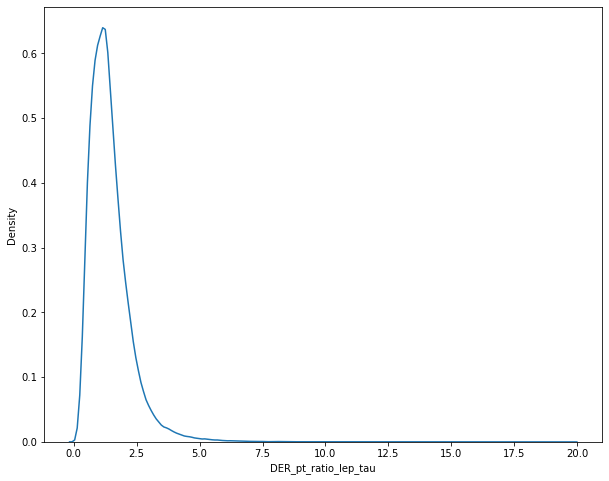

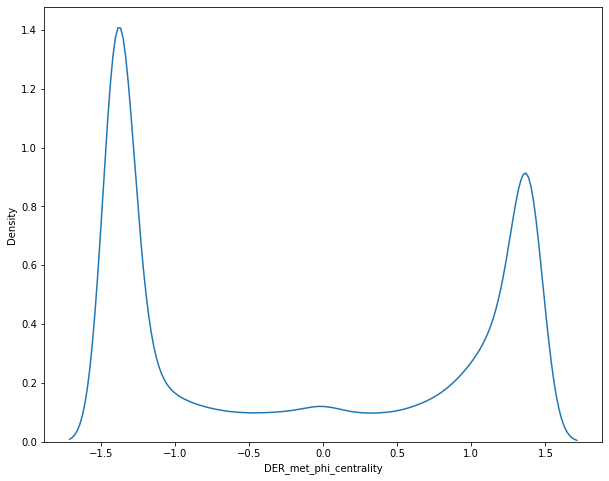

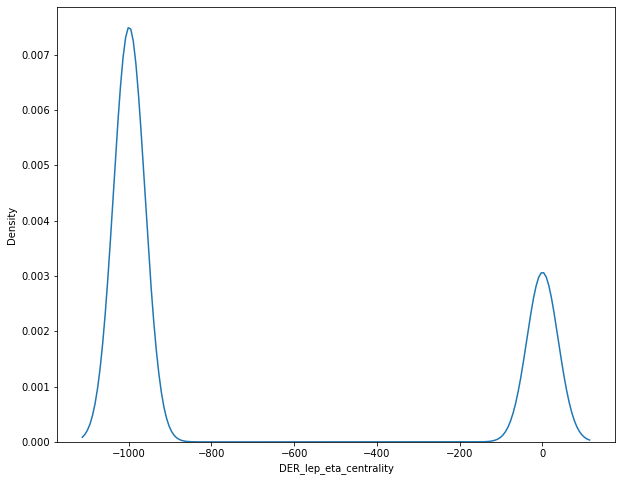

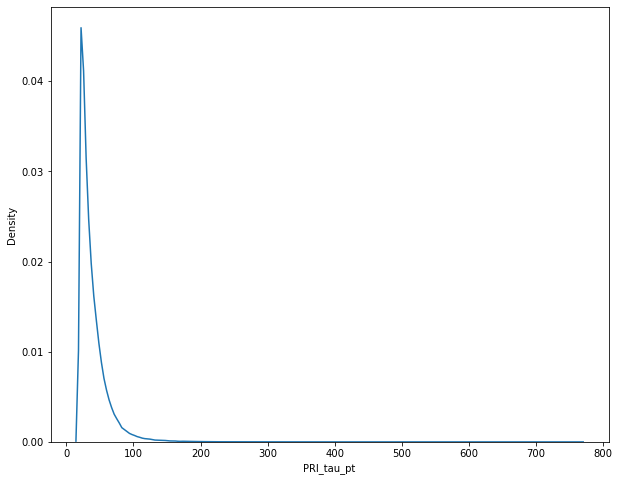

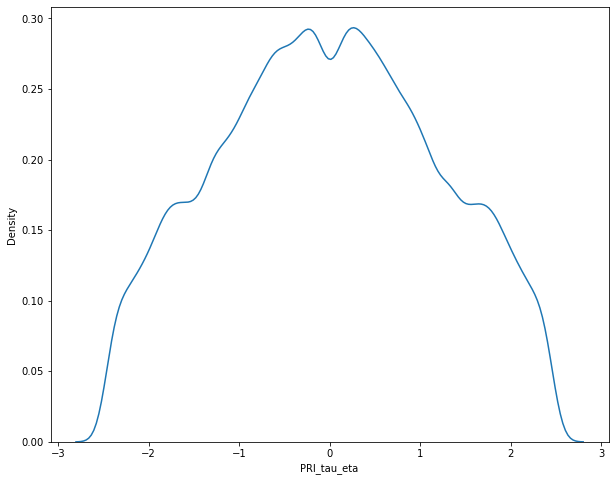

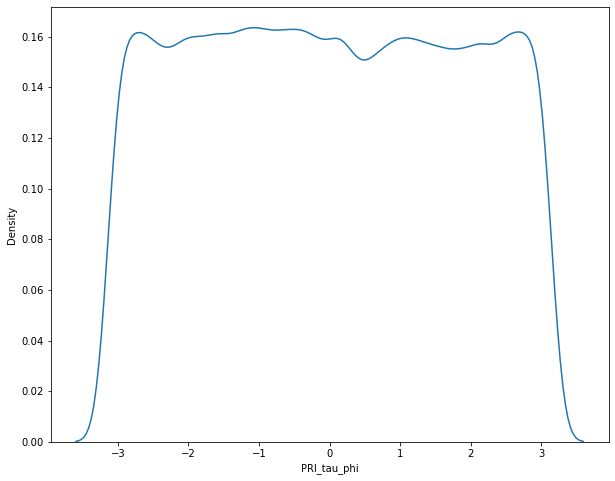

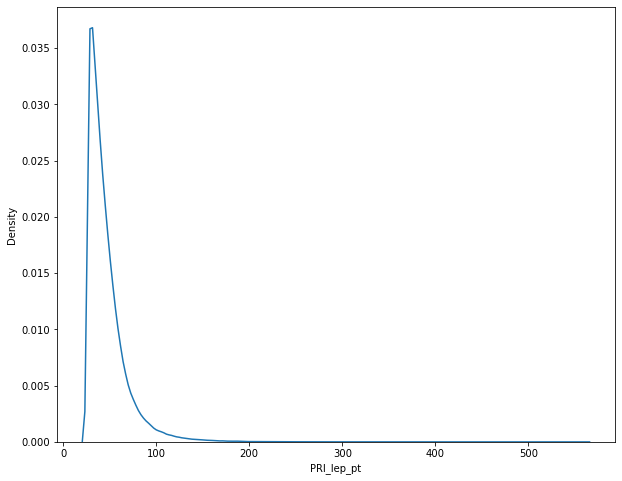

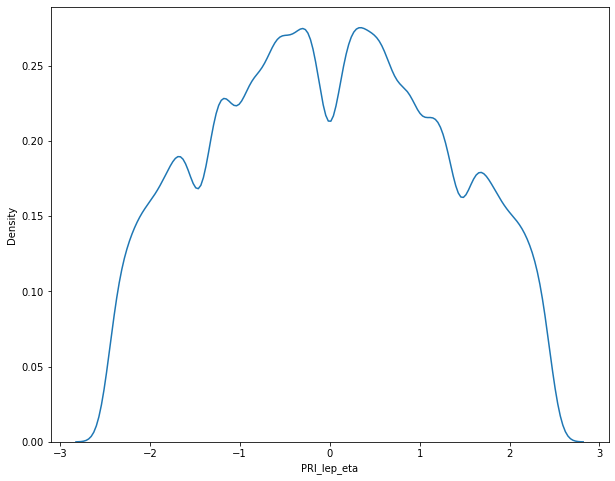

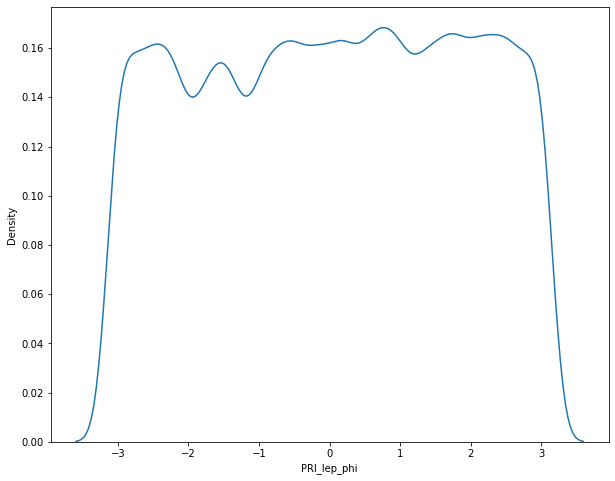

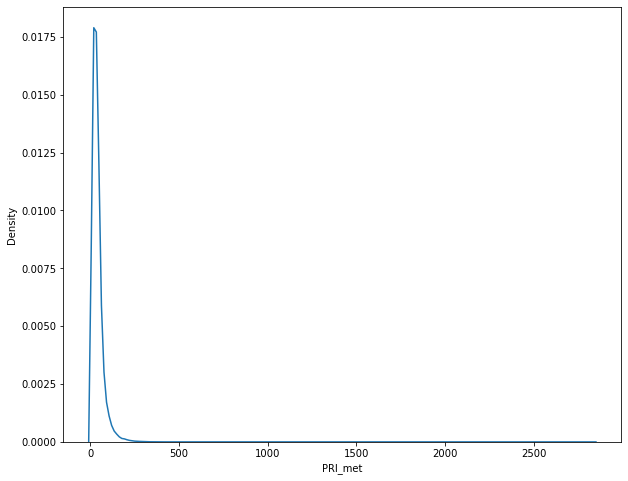

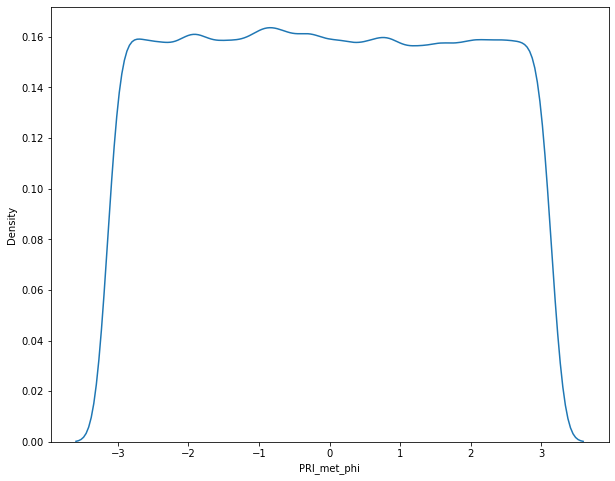

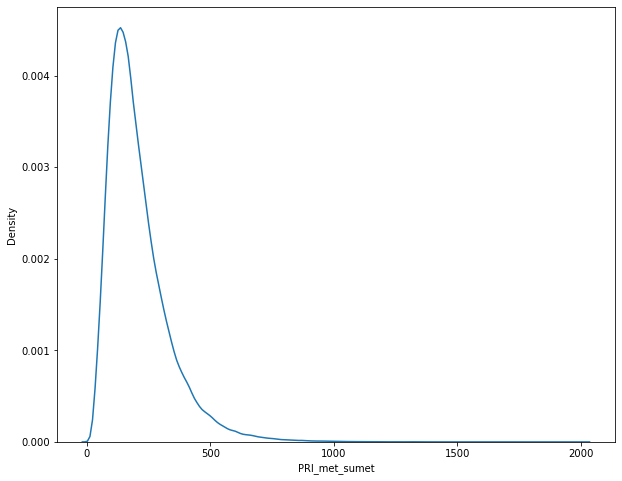

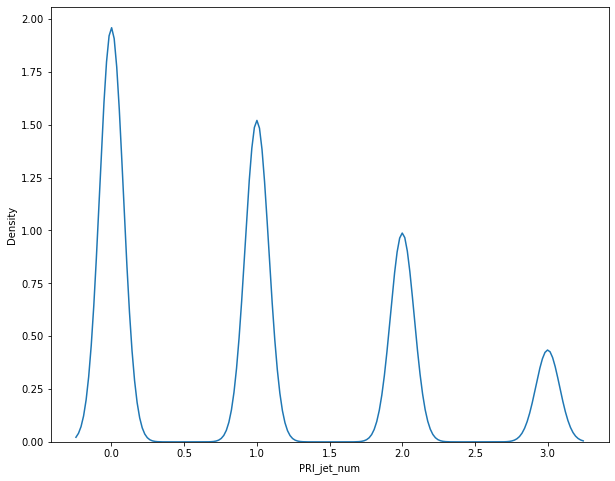

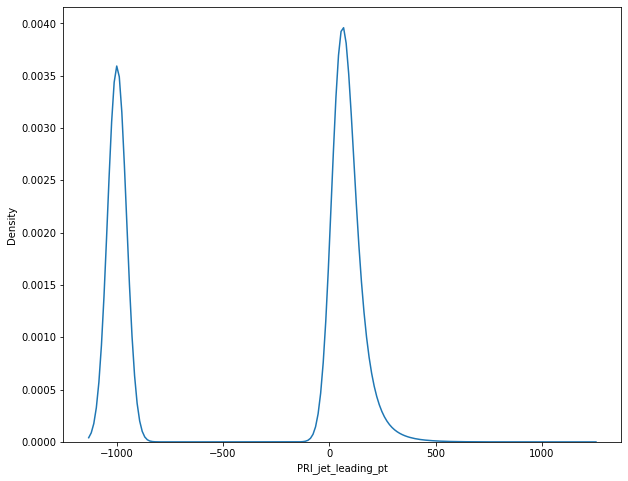

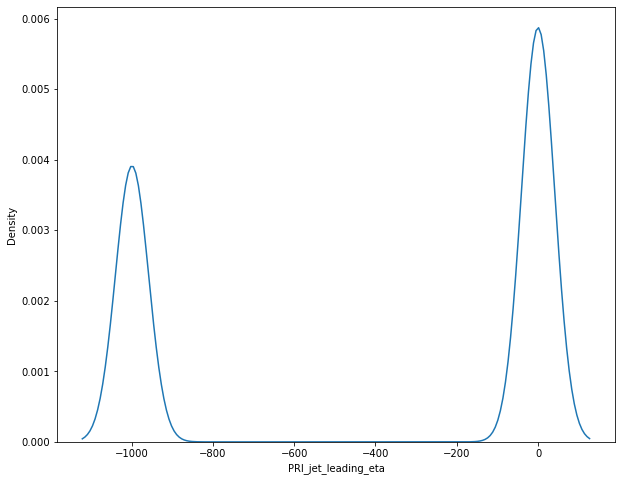

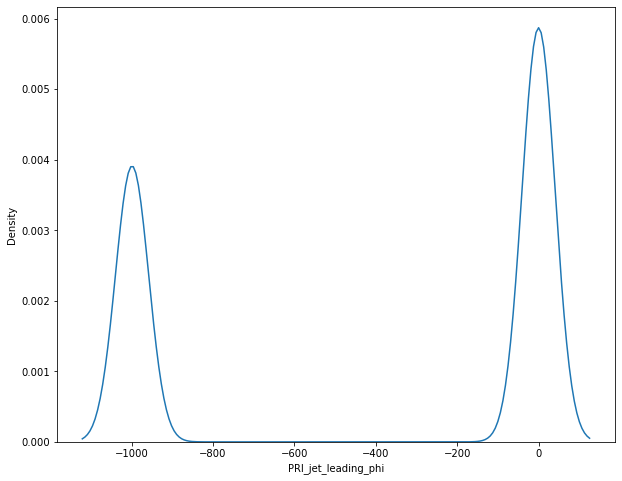

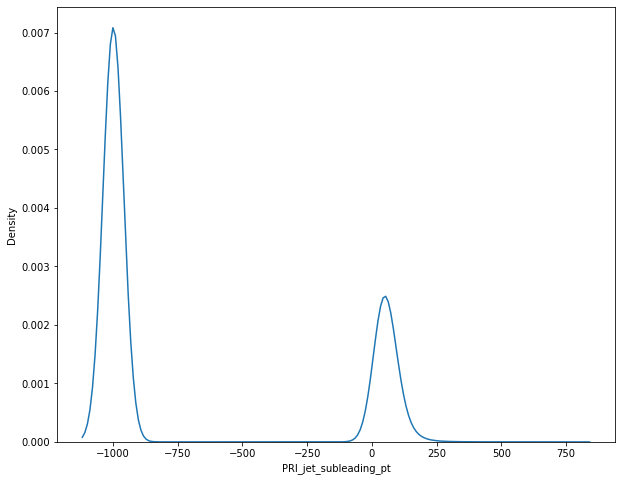

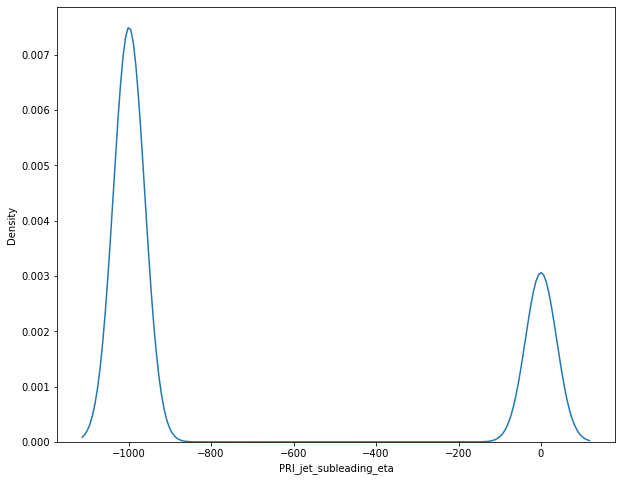

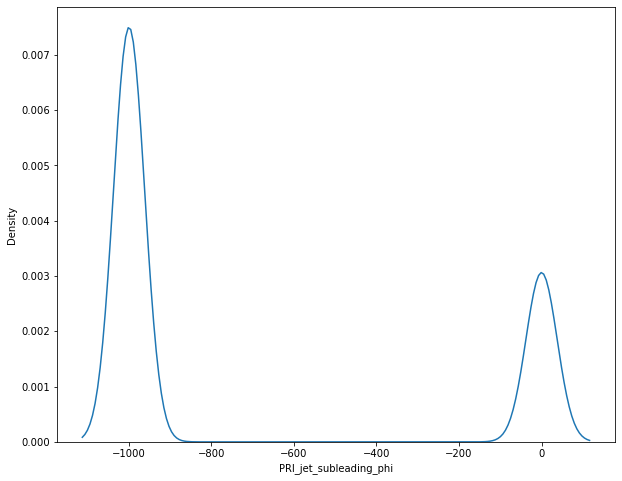

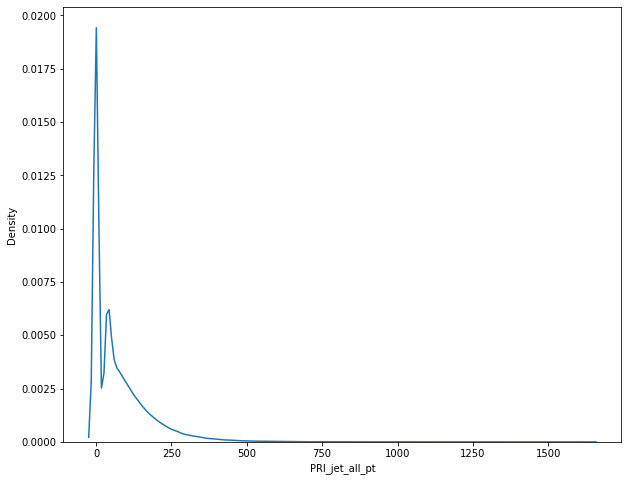

In [27]:
for col in df.drop(columns=['Label']):
    sns.kdeplot(x=col, data=df)
    plt.show()

### Bivariate Analysis

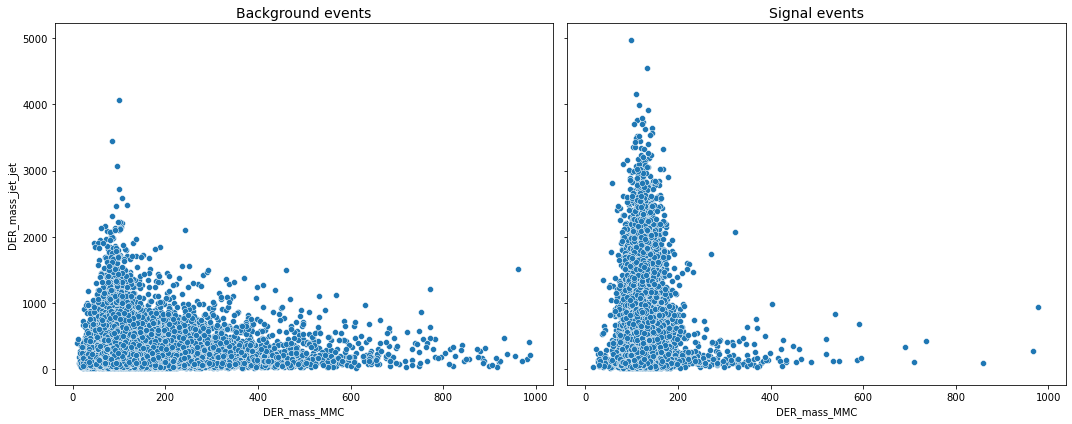

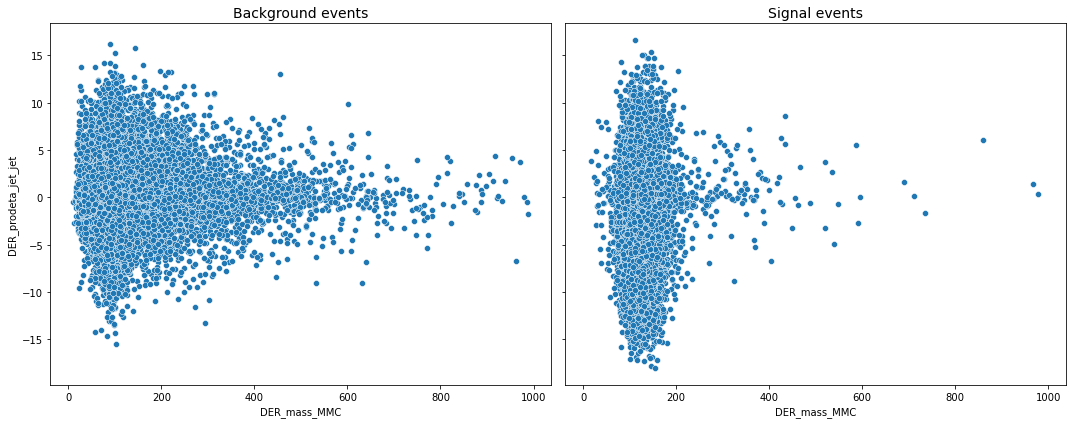

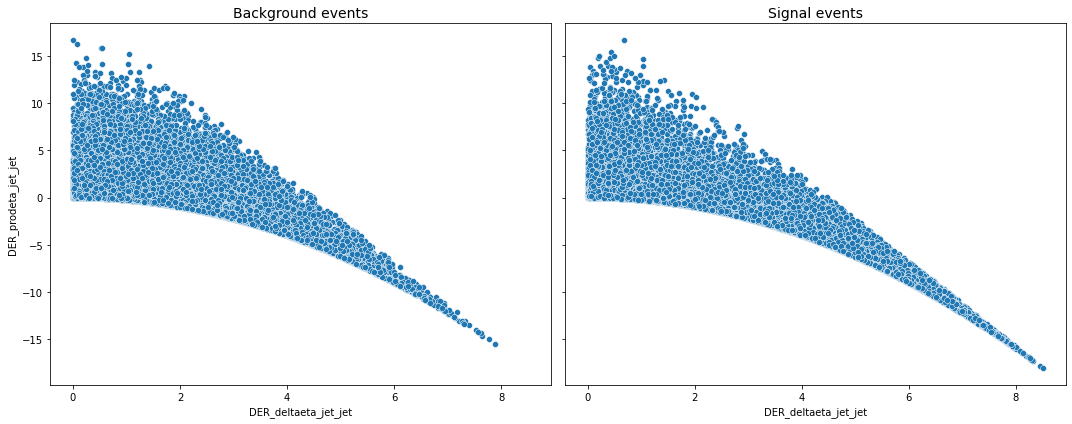

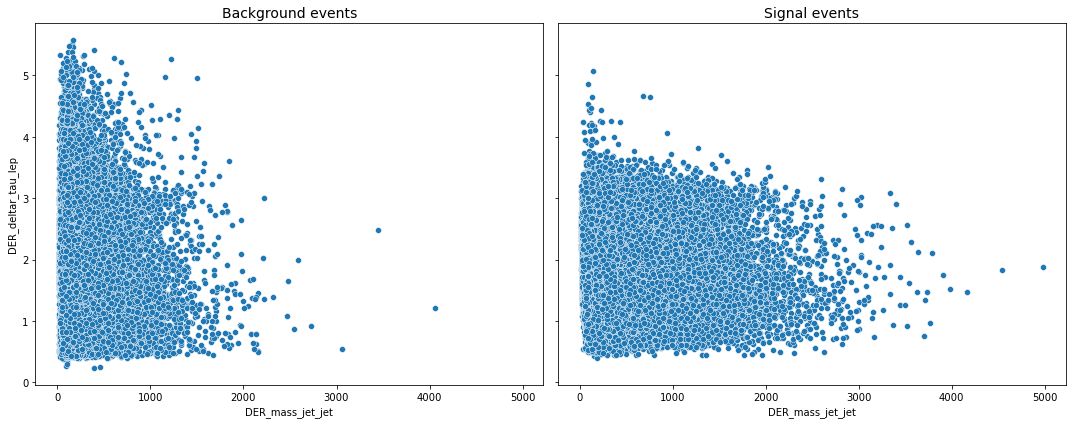

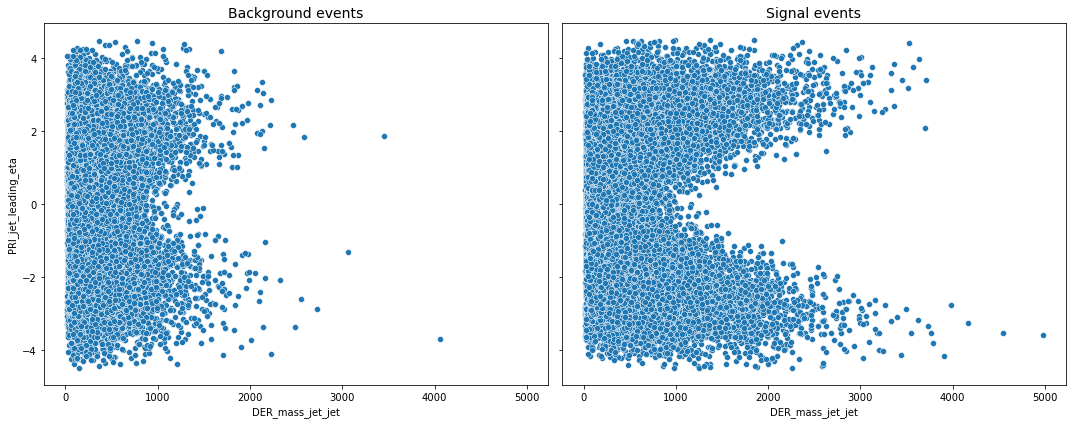

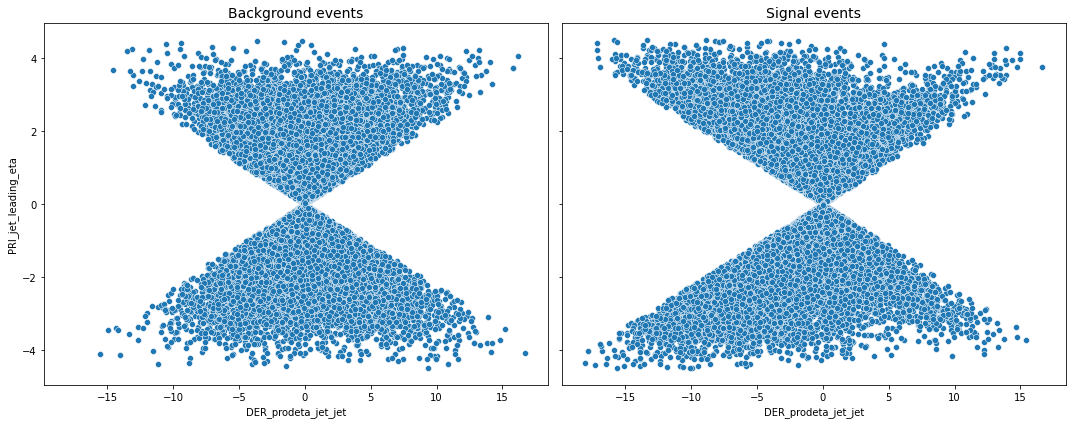

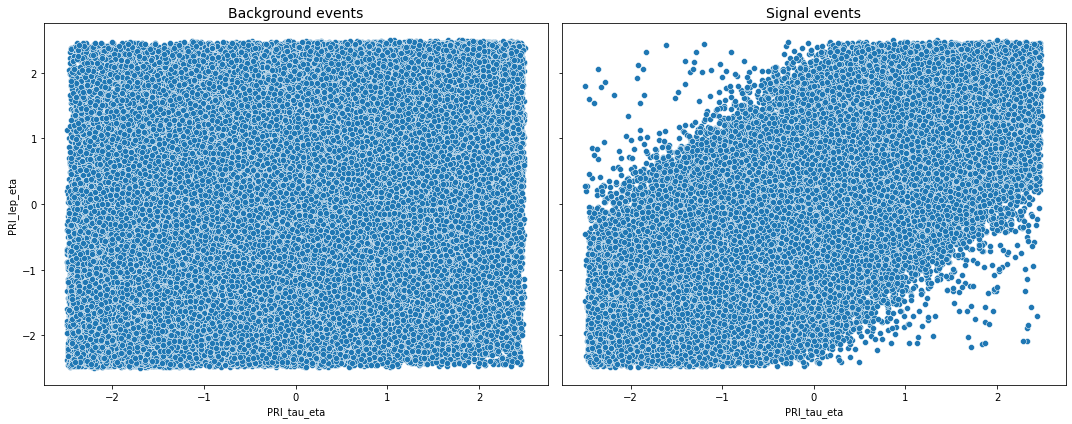

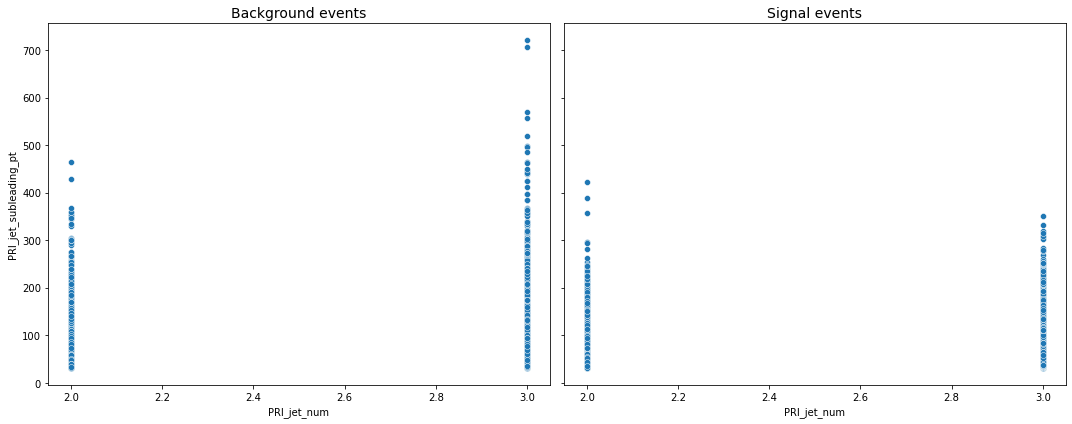

In [28]:
pairs_selected = [
    ('DER_mass_MMC', 'DER_mass_jet_jet'),
    ('DER_mass_MMC', 'DER_prodeta_jet_jet'),
    ('DER_deltaeta_jet_jet', 'DER_prodeta_jet_jet'),
    ('DER_mass_jet_jet', 'DER_deltar_tau_lep'),
    ('DER_mass_jet_jet', 'PRI_jet_leading_eta'),
    ('DER_prodeta_jet_jet', 'PRI_jet_leading_eta'),
    ('PRI_tau_eta', 'PRI_lep_eta'),
    ('PRI_jet_num', 'PRI_jet_subleading_pt')
]
for item in pairs_selected:
    fig, ax = plt.subplots(1, 2, figsize = (15, 6), sharex = True, sharey = True)
    sns.scatterplot(data = background_events.replace(-999, np.nan), x = item[0], y = item[1], ax = ax[0])
    sns.scatterplot(data = signal_events.replace(-999, np.nan), x = item[0], y = item[1], ax = ax[1])
    ax[0].set_title("Background events", fontsize = 14)
    ax[1].set_title("Signal events", fontsize = 14)
    plt.tight_layout()
plt.show()

### Multivariate Analysis

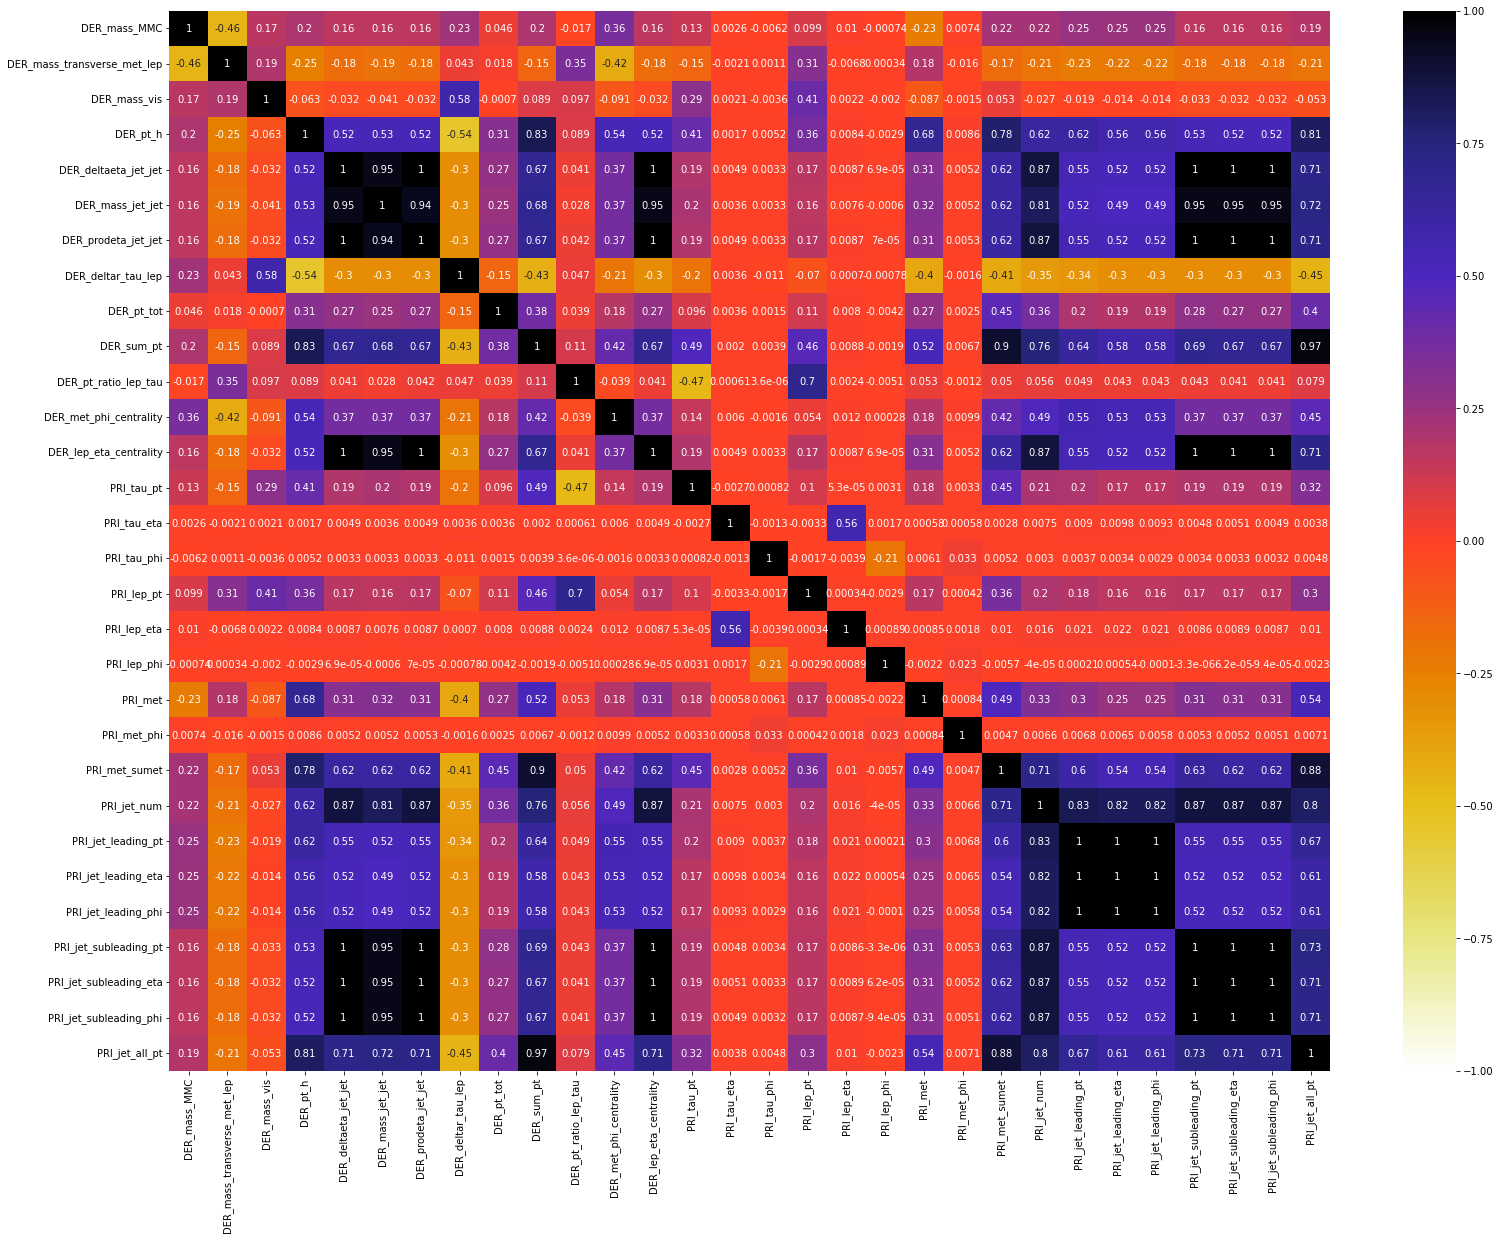

In [29]:
plt.figure(figsize = (26, 19.5))
sns.heatmap(df.corr(), vmin = -1, vmax = 1, annot = True, cmap = plt.cm.CMRmap_r)
plt.show()

## Feature Engineering

In [30]:
df['Label'] = df['Label'].replace(to_replace='s', value=1)
df['Label'] = df['Label'].replace(to_replace='b', value=0)

In [31]:
df['Label'].dtype

dtype('int64')

In [32]:
df = df.replace(-999, np.nan)
df = df.fillna(df.mean())

In [33]:
X = df.drop(columns=['Label'])
y = df['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [34]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

## Model Development (Training, Testing and Evaluation)

### Model 1: Baseline NN using Tensorflow and Keras

In [35]:
!pip install tensorflow

  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached flatbuffers-23.1.4-py2.py3-none-any.whl (26 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached absl_py-1.4.0-py3-none-any.whl (126 kB)
  Using cached termcolor-2.2.0-py3-none-any.whl (6.6 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached tensorflow_io_gcs_filesystem-0.29.0-cp39-cp39-win_amd64.whl (1.5 MB)
  Using cached tensorboard_data_server-0.6.1-py3-none-any.whl (2.4 kB)
  Using cached google_auth_oauthlib-0.4.6-py2.py3-none-any.whl (18 kB)
  Using cached requests_oauthlib-1.3.1-py2.py3-none-any.whl (23 kB)
  Using cached oauthlib-3.2.2-py3-none-any.whl (151 kB)


ERROR: Could not install packages due to an OSError: [WinError 32] The process cannot access the file because it is being used by another process: 'C:\\Users\\yashs\\anaconda3\\Lib\\site-packages\\requests_oauthlib\\compliance_fixes\\plentymarkets.py'
Consider using the `--user` option or check the permissions.



  Using cached tensorflow-2.11.0-cp39-cp39-win_amd64.whl (1.9 kB)
  Using cached tensorflow_intel-2.11.0-cp39-cp39-win_amd64.whl (266.3 MB)
  Using cached tensorboard-2.11.2-py3-none-any.whl (6.0 MB)
  Using cached libclang-15.0.6.1-py2.py3-none-win_amd64.whl (23.2 MB)
  Using cached tensorflow_estimator-2.11.0-py2.py3-none-any.whl (439 kB)


In [36]:
!pip install torch

In [38]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping


In [40]:
!pip install keras-tuner

In [41]:
import keras_tuner as kt

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import joblib

In [42]:
epochs = 50
batch_size = 32

auc_roc_metric = keras.metrics.AUC(curve='ROC')
precision_metric = keras.metrics.Precision()

In [46]:
model = Sequential()
model.add(Dense(100, input_shape=(X_train.shape[-1],), activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(0.001),
              loss='binary_crossentropy',
              metrics=[precision_metric,auc_roc_metric])

model.fit(X_train.values,y_train, 
                    validation_data = (X_test.values, y_test), epochs=epochs, batch_size=batch_size, callbacks = [early_stop])

Epoch 1/50
5469/5469 [==============================] - 39s 6ms/step - loss: 0.5023 - precision: 0.6757 - auc: 0.8210 - val_loss: 0.4511 - val_precision: 0.7200 - val_auc: 0.8511
Epoch 2/50
5469/5469 [==============================] - 29s 5ms/step - loss: 0.4405 - precision: 0.7193 - auc: 0.8584 - val_loss: 0.4411 - val_precision: 0.6589 - val_auc: 0.8697
Epoch 3/50
5469/5469 [==============================] - 29s 5ms/step - loss: 0.4263 - precision: 0.7327 - auc: 0.8680 - val_loss: 0.4230 - val_precision: 0.7761 - val_auc: 0.8749
Epoch 4/50
5469/5469 [==============================] - 29s 5ms/step - loss: 0.4153 - precision: 0.7430 - auc: 0.8752 - val_loss: 0.4014 - val_precision: 0.7709 - val_auc: 0.8840
Epoch 5/50
5469/5469 [==============================] - 27s 5ms/step - loss: 0.4061 - precision: 0.7515 - auc: 0.8812 - val_loss: 0.4012 - val_precision: 0.7554 - val_auc: 0.8837
Epoch 6/50
5469/5469 [==============================] - 28s 5ms/step - loss: 0.4010 - precision: 0.7600 -

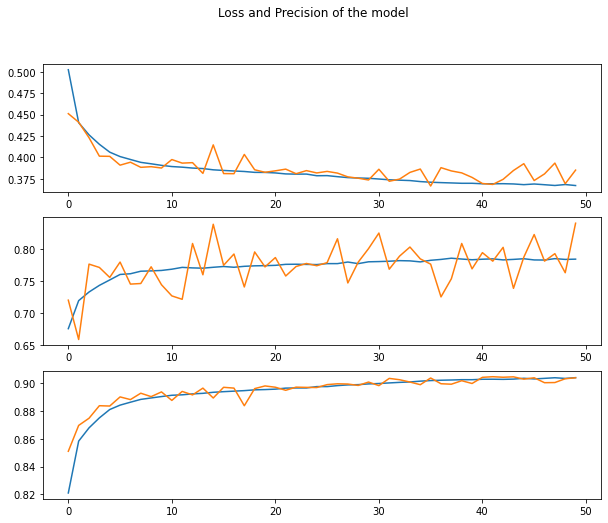

In [47]:
df_result_2 = pd.DataFrame(model.history.history)

fig, (ax1, ax2, ax3) = plt.subplots(3)
fig.suptitle('Loss and Precision of the model')
ax1.plot(df_result_2[['loss','val_loss']])
ax2.plot(df_result_2[['precision','val_precision']])
ax3.plot(df_result_2[['auc','val_auc']])
plt.show()

In [48]:
p_pred = model.predict(X_test)
p_pred = p_pred.flatten()
y_pred = np.where(p_pred > 0.5, 1, 0)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

2344/2344 [==============================] - 5s 2ms/step
[[46551  3004]
 [ 9712 15733]]
              precision    recall  f1-score   support

           0       0.83      0.94      0.88     49555
           1       0.84      0.62      0.71     25445

    accuracy                           0.83     75000
   macro avg       0.83      0.78      0.80     75000
weighted avg       0.83      0.83      0.82     75000



- The model has an accuracy of 0.83
- As shown in the graphs above, the did not encounter any overfitting issues for its loss and AUC metrics (1st and 3rd graphs, respectively)
- The model has a precision of 0.86 and 0.77 for background and signal events.

We will try to use keras tuner to improve further the performance of the model

### Model 2: NN with Keras Tuner

In [49]:
def model_builder(hp):
    hp_units = hp.Int('units', min_value=32, max_value=512, step=32)
    drp_units = hp.Choice('rate', values=[0.2, 0.3, 0.4, 0.5])
    
    model = Sequential()
    model.add(Dense(units=hp_units, input_shape=[30], activation='relu'))
    model.add(Dropout(rate=drp_units))
    model.add(Dense(units=hp_units, activation='relu'))
    model.add(Dropout(rate=drp_units))
    model.add(Dense(units=hp_units, activation='relu'))
    model.add(Dropout(rate=drp_units))
    model.add(Dense(1, activation='sigmoid'))

    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])


    model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                loss='binary_crossentropy',
                metrics=[precision_metric,auc_roc_metric])

    return model

In [50]:
tuner = kt.RandomSearch(
    model_builder,
    objective='val_loss',
    max_trials=5)

In [51]:
early_stop = EarlyStopping(monitor='val_loss',mode='min', verbose = 1, patience=25)
callback = keras.callbacks.ModelCheckpoint(filepath="./", monitor='val_loss', save_best_only=False, save_weights_only=False, mode='auto', save_freq='epoch')

In [52]:
tuner.search(X_train.values, y_train, epochs=20, validation_data = (X_test, y_test), callbacks=[early_stop,callback])

best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")

Trial 5 Complete [00h 09m 22s]
val_loss: 0.5219452977180481

Best val_loss So Far: 0.4184885025024414
Total elapsed time: 01h 19m 37s
INFO:tensorflow:Oracle triggered exit


INFO:tensorflow:Oracle triggered exit



The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 288 and the optimal learning rate for the optimizer
is 0.001.



In [53]:
best_hyperparameter = tuner.get_best_hyperparameters(num_trials=1)[0]
best_hyperparameter.values

{'units': 288, 'rate': 0.3, 'learning_rate': 0.001}

In [54]:
best_model = tuner.get_best_models(num_models=1)[0]
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 288)               8928      
                                                                 
 dropout (Dropout)           (None, 288)               0         
                                                                 
 dense_1 (Dense)             (None, 288)               83232     
                                                                 
 dropout_1 (Dropout)         (None, 288)               0         
                                                                 
 dense_2 (Dense)             (None, 288)               83232     
                                                                 
 dropout_2 (Dropout)         (None, 288)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 2

In [55]:
tuned_model = tuner.hypermodel.build(best_hyperparameter)
tuned_model.fit(X_train.values,y_train, 
                    validation_data = (X_test.values, y_test), epochs=15, callbacks = [early_stop])

Epoch 1/15
5469/5469 [==============================] - 38s 7ms/step - loss: 0.6403 - precision: 0.6332 - auc: 0.7227 - val_loss: 0.4653 - val_precision: 0.7188 - val_auc: 0.8497
Epoch 2/15
5469/5469 [==============================] - 40s 7ms/step - loss: 0.4750 - precision: 0.7102 - auc: 0.8350 - val_loss: 0.4559 - val_precision: 0.7816 - val_auc: 0.8604
Epoch 3/15
5469/5469 [==============================] - 36s 7ms/step - loss: 0.4662 - precision: 0.7230 - auc: 0.8430 - val_loss: 0.4365 - val_precision: 0.7930 - val_auc: 0.8650
Epoch 4/15
5469/5469 [==============================] - 36s 7ms/step - loss: 0.4606 - precision: 0.7251 - auc: 0.8471 - val_loss: 0.4482 - val_precision: 0.8198 - val_auc: 0.8695
Epoch 5/15
5469/5469 [==============================] - 36s 7ms/step - loss: 0.4582 - precision: 0.7267 - auc: 0.8492 - val_loss: 0.4423 - val_precision: 0.8198 - val_auc: 0.8725
Epoch 6/15
5469/5469 [==============================] - 37s 7ms/step - loss: 0.4532 - precision: 0.7332 -

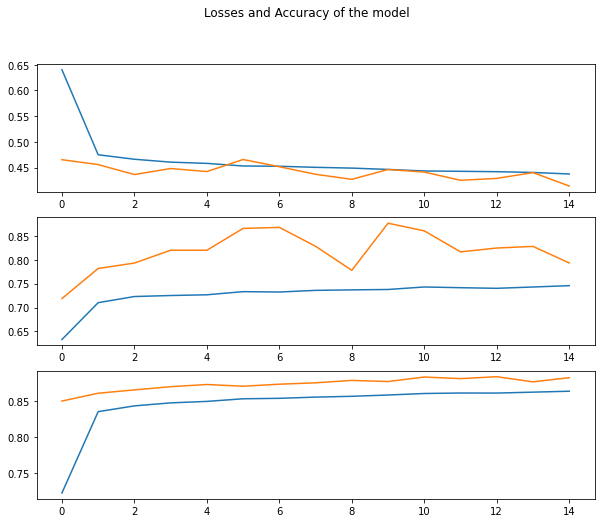

In [56]:
df_tuned_model = pd.DataFrame(tuned_model.history.history)

fig, (ax1, ax2,ax3) = plt.subplots(3)
fig.suptitle('Losses and Accuracy of the model')
ax1.plot(df_tuned_model[['loss','val_loss']])
ax2.plot(df_tuned_model[['precision','val_precision']])
ax3.plot(df_tuned_model[['auc','val_auc']])

In [57]:
p_pred = tuned_model.predict(X_test)
p_pred = p_pred.flatten()
y_pred = np.where(p_pred > 0.5, 1, 0)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

2344/2344 [==============================] - 4s 2ms/step
[[45534  4021]
 [10019 15426]]
              precision    recall  f1-score   support

           0       0.82      0.92      0.87     49555
           1       0.79      0.61      0.69     25445

    accuracy                           0.81     75000
   macro avg       0.81      0.76      0.78     75000
weighted avg       0.81      0.81      0.81     75000



- The tuned model has an accuracy of 0.81, which is lower as compared to the first model
- As shown in the graphs above, the did not encounter any overfitting issues for its loss and AUC metrics (1st and 3rd graphs, respectively)
- The model has a precision of 0.82 and 0.79 for background and signal events.

As we can see the tuned model has lower accuracy but its precision for the signal event is higher as compared to the 1st model.

### Model 3: NN using Pytorch

In [58]:
EPOCHS = 100
BATCH_SIZE = 64
LEARNING_RATE = 0.001

In [59]:
X_train = torch.Tensor(X_train.values)
X_test = torch.Tensor(X_test.values)
y_train = torch.Tensor(y_train.values)

In [60]:
class TrainData(Dataset):
    
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data
        
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]
        
    def __len__ (self):
        return len(self.X_data)


## test data    
class TestData(Dataset):
    
    def __init__(self, X_data):
        self.X_data = X_data
        
    def __getitem__(self, index):
        return self.X_data[index]
        
    def __len__ (self):
        return len(self.X_data)

In [62]:
train_data = TrainData(torch.FloatTensor(X_train), torch.FloatTensor(y_train))
test_data = TestData(torch.FloatTensor(X_test))

train_dataloader = DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)
test_dataloader = DataLoader(dataset=test_data, batch_size=1)

In [61]:
class NN_Model(nn.Module):
    def __init__(self):
        super(NN_Model, self).__init__()
        self.layer_1 = nn.Linear(X_train.shape[1], 200) 
        self.layer_2 = nn.Linear(200, 100)
        self.layer_out = nn.Linear(100, 1)    
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.1)
       
        
    def forward(self, inputs):
        x = self.relu(self.layer_1(inputs))
        x = self.relu(self.layer_2(x))
        x = self.dropout(x)
        x = self.layer_out(x)
        return x

In [63]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [64]:
model = NN_Model()
model.to(device)
print(model)
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

NN_Model(
  (layer_1): Linear(in_features=30, out_features=200, bias=True)
  (layer_2): Linear(in_features=200, out_features=100, bias=True)
  (layer_out): Linear(in_features=100, out_features=1, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.1, inplace=False)
)


In [65]:
def binary_acc(y_pred, y_test):
    y_pred_tag = torch.round(torch.sigmoid(y_pred))
    correct_results_sum = (y_pred_tag == y_test).sum().float()
    acc = correct_results_sum/y_test.shape[0]
    acc = torch.round(acc * 100)
    
    return acc

In [66]:
losss = []
epoch_losss = []
epoch_accc = []
accs = []
model.train()
for e in range(1, EPOCHS+1):
    epoch_loss = 0
    epoch_acc = 0
    for X_batch, y_batch in train_dataloader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        
        y_pred = model(X_batch)
        y_pred = y_pred.squeeze(1)
        loss = criterion(y_pred, y_batch)
        acc = binary_acc(y_pred, y_batch)
        
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()
        losss.append(epoch_loss)
        accs.append(epoch_acc)
    epoch_losss.append(epoch_loss/len(train_dataloader))
    epoch_accc.append(epoch_acc/len(train_dataloader))

    print(f'Epoch {e+0:03}: | Loss: {epoch_loss/len(train_dataloader):.5f} | Acc: {epoch_acc/len(train_dataloader):.3f}')

Epoch 001: | Loss: 0.49029 | Acc: 76.887
Epoch 002: | Loss: 0.44075 | Acc: 79.287
Epoch 003: | Loss: 0.43087 | Acc: 80.033
Epoch 004: | Loss: 0.42242 | Acc: 80.503
Epoch 005: | Loss: 0.41575 | Acc: 80.938
Epoch 006: | Loss: 0.41073 | Acc: 81.234
Epoch 007: | Loss: 0.40533 | Acc: 81.536
Epoch 008: | Loss: 0.40218 | Acc: 81.871
Epoch 009: | Loss: 0.39933 | Acc: 82.050
Epoch 010: | Loss: 0.39770 | Acc: 82.123
Epoch 011: | Loss: 0.39464 | Acc: 82.190
Epoch 012: | Loss: 0.39419 | Acc: 82.244
Epoch 013: | Loss: 0.39327 | Acc: 82.361
Epoch 014: | Loss: 0.39181 | Acc: 82.427
Epoch 015: | Loss: 0.39111 | Acc: 82.385
Epoch 016: | Loss: 0.39001 | Acc: 82.509
Epoch 017: | Loss: 0.38892 | Acc: 82.507
Epoch 018: | Loss: 0.38735 | Acc: 82.650
Epoch 019: | Loss: 0.38658 | Acc: 82.600
Epoch 020: | Loss: 0.38655 | Acc: 82.605
Epoch 021: | Loss: 0.38611 | Acc: 82.700
Epoch 022: | Loss: 0.38586 | Acc: 82.681
Epoch 023: | Loss: 0.38438 | Acc: 82.761
Epoch 024: | Loss: 0.38317 | Acc: 82.805
Epoch 025: | Los

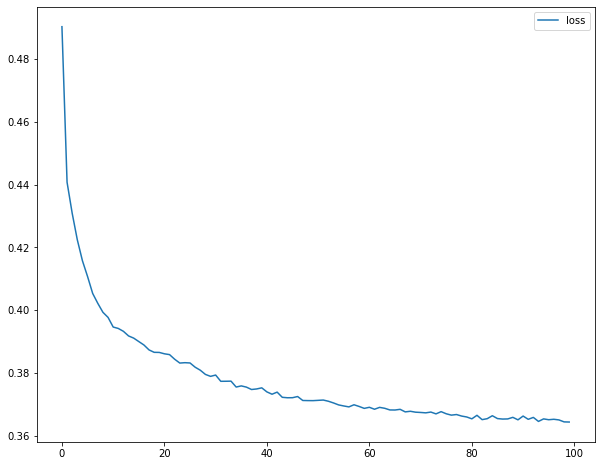

In [67]:
plt.plot(epoch_losss, label='loss')
plt.legend()
plt.show()

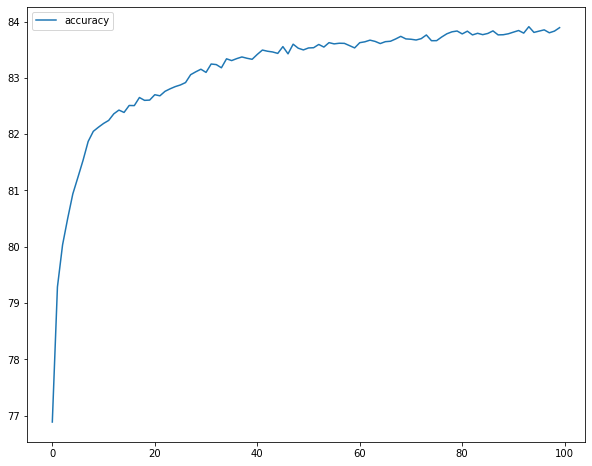

In [68]:
plt.plot(epoch_accc, label='accuracy')
plt.legend()
plt.show()

In [69]:
y_pred_list = []
model.eval()
with torch.no_grad():
    for X_batch in test_dataloader:
        X_batch = X_batch.to(device)
        y_test_pred = model(X_batch)
        y_test_pred = torch.sigmoid(y_test_pred)
        y_pred_tag = torch.round(y_test_pred)
        y_pred_list.append(y_pred_tag.cpu().numpy())

y_pred_list = [a.squeeze().tolist() for a in y_pred_list]

In [70]:
confusion_matrix(y_test, y_pred_list)

array([[42889,  6666],
       [ 6007, 19438]], dtype=int64)

In [71]:
print(classification_report(y_test, y_pred_list))

              precision    recall  f1-score   support

           0       0.88      0.87      0.87     49555
           1       0.74      0.76      0.75     25445

    accuracy                           0.83     75000
   macro avg       0.81      0.81      0.81     75000
weighted avg       0.83      0.83      0.83     75000



- The pytorch model has an accuracy of 0.84, which has the highest accuracy among the three models.
- As shown in the graphs above, the did not encounter any overfitting issues
- The model has a precision of 0.87 and 0.76 for background and signal events.

As we can see the pytorch model has the highest accuracy and precision values (background and signal events)

## Save the Model/s

In [73]:
import joblib
import pickle as pkl

In [75]:
joblib.dump(tuned_model, 'tuned_model.pkl')
joblib.dump(model, 'pytorch_model.pkl')

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...layers\dense_3
......vars
.........0
.........1
...layers\dropout
......vars
...layers\dropout_1
......vars
...layers\dropout_2
......vars
...metrics\auc
......vars
.........0
.........1
.........2
.........3
...metrics\mean
......vars
.........0
.........1
...metrics\precision
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........2
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2023-01-15 19:34:39         3574
metadata.json                                  2023-01

['pytorch_model.pkl']